# Importing the Libraries

In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.3f}'.format

# import train-test split
from sklearn.model_selection import train_test_split

#from termcolor import colored
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

##Reading the Data

In [189]:
data = pd.read_csv('/content/All-time Table-Bangalore-Wards.csv', sep =',')

In [190]:
data.head()

Ward   Searches Searches which got estimate Searches for Quotes  \
0     Other Wards  30,71,626                   27,12,391           18,90,877   
1  Shantala Nagar  24,01,161                   23,84,599           20,67,653   
2  Doddakanahalli  17,27,250                   17,11,471           14,56,511   
3           Agara  12,26,026                   12,14,797           10,43,176   
4     Koramangala  11,69,452                   11,58,300            9,94,218   

  Searches which got Quotes  Bookings Completed Trips Search-to-estimate Rate  \
0                  9,75,708  9,54,414        5,89,585                   88.3%   
1                  8,56,568  8,41,607        4,74,271                   99.3%   
2                  5,96,480  5,87,089        3,50,792                   99.1%   
3                  5,20,539  5,08,562        3,36,728                   99.1%   
4                  5,28,008  5,15,062        3,34,904                   99.1%   

  Estimate-to-search for quotes Rate Quote Acceptance Rate  \
0                              69.7%                 51.6%   
1                              86.7%                 41.4%   
2                              85.1%                 40.9%   
3                              85.9%                 49.9%   
4                              85.8%                 53.1%   

  Quote-to-booking Rate Cancelled Bookings Booking Cancellation Rate  \
0                 97.8%           3,64,609                     38.2%   
1                 98.3%           3,67,010                     43.6%   
2                 98.4%           2,36,139                     40.2%   
3                 97.7%           1,71,714                     33.8%   
4                 97.5%           1,80,001                     34.9%   

  Conversion Rate Drivers' Earnings  Average Distance per Trip (km)  \
0           19.2%     ₹12,00,07,713                          10.370   
1           19.8%      ₹7,11,77,412                           7.480   
2           20.3%      ₹5,92,11,778                           9.020   
3           27.5%      ₹4,75,68,017                           7.630   
4           28.6%      ₹4,45,96,808                           6.970   

  Average Fare per Trip Distance Travelled (km)  
0               ₹175.04               71,90,364  
1               ₹138.74               38,63,534  
2               ₹159.54               33,54,728  
3               ₹137.67               26,33,026  
4               ₹128.74               24,37,405

# Uderstanding the Features

In [191]:
data.describe()

Average Distance per Trip (km)
count                         245.000
mean                            7.412
std                             1.135
min                             5.010
25%                             6.580
50%                             7.220
75%                             8.190
max                            11.420

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Ward                                245 non-null    object 
 1   Searches                            245 non-null    object 
 2   Searches which got estimate         245 non-null    object 
 3   Searches for Quotes                 245 non-null    object 
 4   Searches which got Quotes           245 non-null    object 
 5   Bookings                            245 non-null    object 
 6   Completed Trips                     245 non-null    object 
 7   Search-to-estimate Rate             245 non-null    object 
 8   Estimate-to-search for quotes Rate  245 non-null    object 
 9   Quote Acceptance Rate               245 non-null    object 
 10  Quote-to-booking Rate               245 non-null    object 
 11  Cancelled Bookings                  245 non-n

In [193]:
data.isnull().sum()

Ward                                  0
Searches                              0
Searches which got estimate           0
Searches for Quotes                   0
Searches which got Quotes             0
Bookings                              0
Completed Trips                       0
Search-to-estimate Rate               0
Estimate-to-search for quotes Rate    0
Quote Acceptance Rate                 0
Quote-to-booking Rate                 0
Cancelled Bookings                    0
Booking Cancellation Rate             0
Conversion Rate                       0
Drivers' Earnings                     0
Average Distance per Trip (km)        0
Average Fare per Trip                 0
Distance Travelled (km)               0
dtype: int64

##Droping the Duplicates

In [194]:
data.duplicated().sum()

0

In [195]:
data.drop_duplicates(inplace = True)

In [196]:
data.shape

(245, 18)

In [197]:
data_copy = data.drop('Ward', axis =1)

In [198]:
lst = ['Search-to-estimate Rate','Quote Acceptance Rate','Estimate-to-search for quotes Rate','Quote-to-booking Rate','Booking Cancellation Rate','Conversion Rate']
for i in lst :
   data[i] = data[i].str.replace(r'%','')
   data[i] = data[i].str.replace(r',','')

In [199]:
rupee_symbol = ['Average Fare per Trip',"Drivers' Earnings"]

for col in rupee_symbol:
    # Convert column to string type if not already
    data[col] = data[col].astype(str)
    # Apply string replace operation to remove commas
    data[col] = data[col].str.replace(',', '')
    data[col] = data[col].str.replace('₹', '')


In [200]:
data.head()

Ward   Searches Searches which got estimate Searches for Quotes  \
0     Other Wards  30,71,626                   27,12,391           18,90,877   
1  Shantala Nagar  24,01,161                   23,84,599           20,67,653   
2  Doddakanahalli  17,27,250                   17,11,471           14,56,511   
3           Agara  12,26,026                   12,14,797           10,43,176   
4     Koramangala  11,69,452                   11,58,300            9,94,218   

  Searches which got Quotes  Bookings Completed Trips Search-to-estimate Rate  \
0                  9,75,708  9,54,414        5,89,585                    88.3   
1                  8,56,568  8,41,607        4,74,271                    99.3   
2                  5,96,480  5,87,089        3,50,792                    99.1   
3                  5,20,539  5,08,562        3,36,728                    99.1   
4                  5,28,008  5,15,062        3,34,904                    99.1   

  Estimate-to-search for quotes Rate Quote Acceptance Rate  \
0                               69.7                  51.6   
1                               86.7                  41.4   
2                               85.1                  40.9   
3                               85.9                  49.9   
4                               85.8                  53.1   

  Quote-to-booking Rate Cancelled Bookings Booking Cancellation Rate  \
0                  97.8           3,64,609                      38.2   
1                  98.3           3,67,010                      43.6   
2                  98.4           2,36,139                      40.2   
3                  97.7           1,71,714                      33.8   
4                  97.5           1,80,001                      34.9   

  Conversion Rate Drivers' Earnings  Average Distance per Trip (km)  \
0            19.2         120007713                          10.370   
1            19.8          71177412                           7.480   
2            20.3          59211778                           9.020   
3            27.5          47568017                           7.630   
4            28.6          44596808                           6.970   

  Average Fare per Trip Distance Travelled (km)  
0                175.04               71,90,364  
1                138.74               38,63,534  
2                159.54               33,54,728  
3                137.67               26,33,026  
4                128.74               24,37,405

In [201]:
data.shape

(245, 18)

In [202]:
list = ['Searches','Searches which got estimate','Searches for Quotes','Searches which got Quotes','Bookings','Completed Trips','Cancelled Bookings','Distance Travelled (km)']
for i in list :
   data[i] = data[i].str.replace(r',','').astype(int)

In [203]:
for i in data.columns :
  if i != 'Ward' :
   if data[i].dtype =='object' :
     data[i] = data[i].astype(float)

In [204]:
data.dtypes

Ward                                   object
Searches                                int64
Searches which got estimate             int64
Searches for Quotes                     int64
Searches which got Quotes               int64
Bookings                                int64
Completed Trips                         int64
Search-to-estimate Rate               float64
Estimate-to-search for quotes Rate    float64
Quote Acceptance Rate                 float64
Quote-to-booking Rate                 float64
Cancelled Bookings                      int64
Booking Cancellation Rate             float64
Conversion Rate                       float64
Drivers' Earnings                     float64
Average Distance per Trip (km)        float64
Average Fare per Trip                 float64
Distance Travelled (km)                 int64
dtype: object

## Inter Quantile Range

In [205]:
for i in data.columns:
  if data[i].dtype != 'object' :
    lower_bound = data[i].quantile(0.005)
    upper_bound = data[i].quantile(0.99)

    # Remove rows that are outliers based on the quantiles
    data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)]

In [206]:
data = data.reset_index(drop = True)

In [207]:
data.head()

Ward  Searches  Searches which got estimate  \
0      Vinayakanagar    564655                       559717   
1          J P Nagar    526581                       522247   
2            Ejipura    595161                       589132   
3  HSR - Singasandra    633334                       627352   
4   Shakambari Nagar    404779                       401530   

   Searches for Quotes  Searches which got Quotes  Bookings  Completed Trips  \
0               461557                     280715    275406           173474   
1               423506                     272513    266903           172802   
2               496076                     273619    268768           163779   
3               520343                     255679    250108           145339   
4               310798                     215522    211098           143850   

   Search-to-estimate Rate  Estimate-to-search for quotes Rate  \
0                   99.100                              82.500   
1                   99.200                              81.100   
2                   99.000                              84.200   
3                   99.100                              82.900   
4                   99.200                              77.400   

   Quote Acceptance Rate  Quote-to-booking Rate  Cancelled Bookings  \
0                 60.800                 98.100              101845   
1                 64.300                 97.900               93999   
2                 55.200                 98.200              104902   
3                 49.100                 97.800              104704   
4                 69.300                 97.900               67203   

   Booking Cancellation Rate  Conversion Rate  Drivers' Earnings  \
0                     37.000           30.700       23202000.000   
1                     35.200           32.800       21453148.000   
2                     39.000           27.500       21092572.000   
3                     41.900           22.900       21487915.000   
4                     31.800           35.500       16847054.000   

   Average Distance per Trip (km)  Average Fare per Trip  \
0                           7.480                133.850   
1                           6.450                116.660   
2                           6.470                122.290   
3                           7.910                141.290   
4                           6.290                114.150   

   Distance Travelled (km)  
0                  1292724  
1                  1186151  
2                  1148191  
3                  1209859  
4                   935402

In [208]:
data.shape

(178, 18)

##Exploratory Data Analysis

<Axes: >

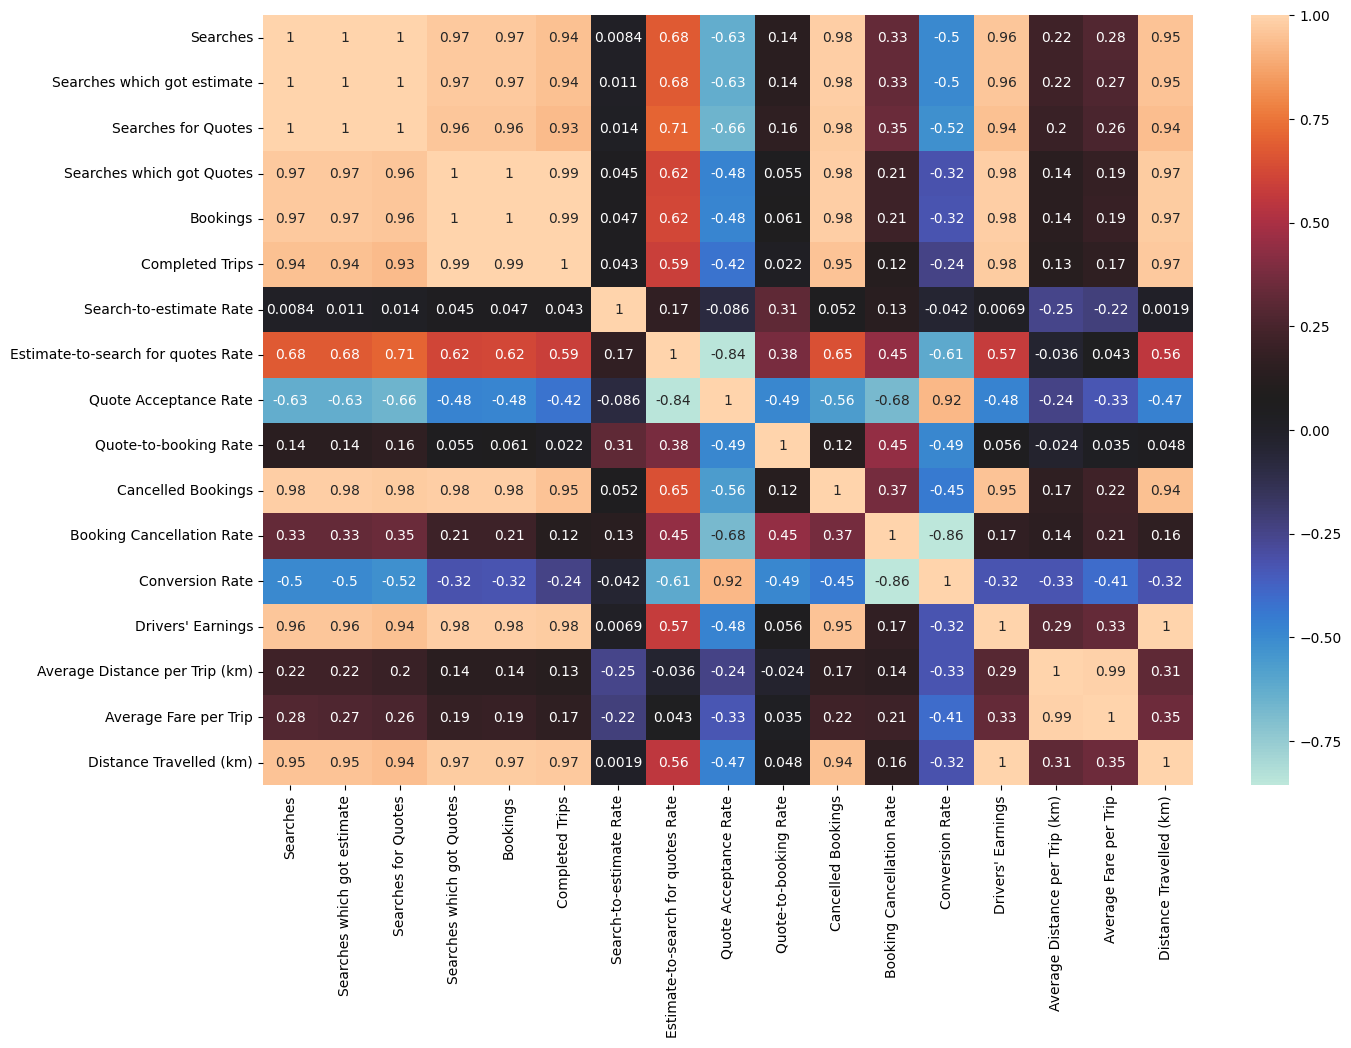

In [209]:
# Corelation with the dataset
data_copy = data.drop('Ward',axis =1)
plt.figure(figsize = (15,10))
sns.heatmap(data_copy.corr(), annot = True, cmap = 'icefire')

In [210]:
data.head()

Ward  Searches  Searches which got estimate  \
0      Vinayakanagar    564655                       559717   
1          J P Nagar    526581                       522247   
2            Ejipura    595161                       589132   
3  HSR - Singasandra    633334                       627352   
4   Shakambari Nagar    404779                       401530   

   Searches for Quotes  Searches which got Quotes  Bookings  Completed Trips  \
0               461557                     280715    275406           173474   
1               423506                     272513    266903           172802   
2               496076                     273619    268768           163779   
3               520343                     255679    250108           145339   
4               310798                     215522    211098           143850   

   Search-to-estimate Rate  Estimate-to-search for quotes Rate  \
0                   99.100                              82.500   
1                   99.200                              81.100   
2                   99.000                              84.200   
3                   99.100                              82.900   
4                   99.200                              77.400   

   Quote Acceptance Rate  Quote-to-booking Rate  Cancelled Bookings  \
0                 60.800                 98.100              101845   
1                 64.300                 97.900               93999   
2                 55.200                 98.200              104902   
3                 49.100                 97.800              104704   
4                 69.300                 97.900               67203   

   Booking Cancellation Rate  Conversion Rate  Drivers' Earnings  \
0                     37.000           30.700       23202000.000   
1                     35.200           32.800       21453148.000   
2                     39.000           27.500       21092572.000   
3                     41.900           22.900       21487915.000   
4                     31.800           35.500       16847054.000   

   Average Distance per Trip (km)  Average Fare per Trip  \
0                           7.480                133.850   
1                           6.450                116.660   
2                           6.470                122.290   
3                           7.910                141.290   
4                           6.290                114.150   

   Distance Travelled (km)  
0                  1292724  
1                  1186151  
2                  1148191  
3                  1209859  
4                   935402

In [211]:
ward_book = data.groupby('Ward')['Bookings'].sum().sort_values(ascending= False)

In [212]:
ward_book = pd.DataFrame(ward_book, columns = ['Bookings'])

In [213]:
ward_book_15 = ward_book.head(15)

<Axes: xlabel='Ward', ylabel='Bookings'>

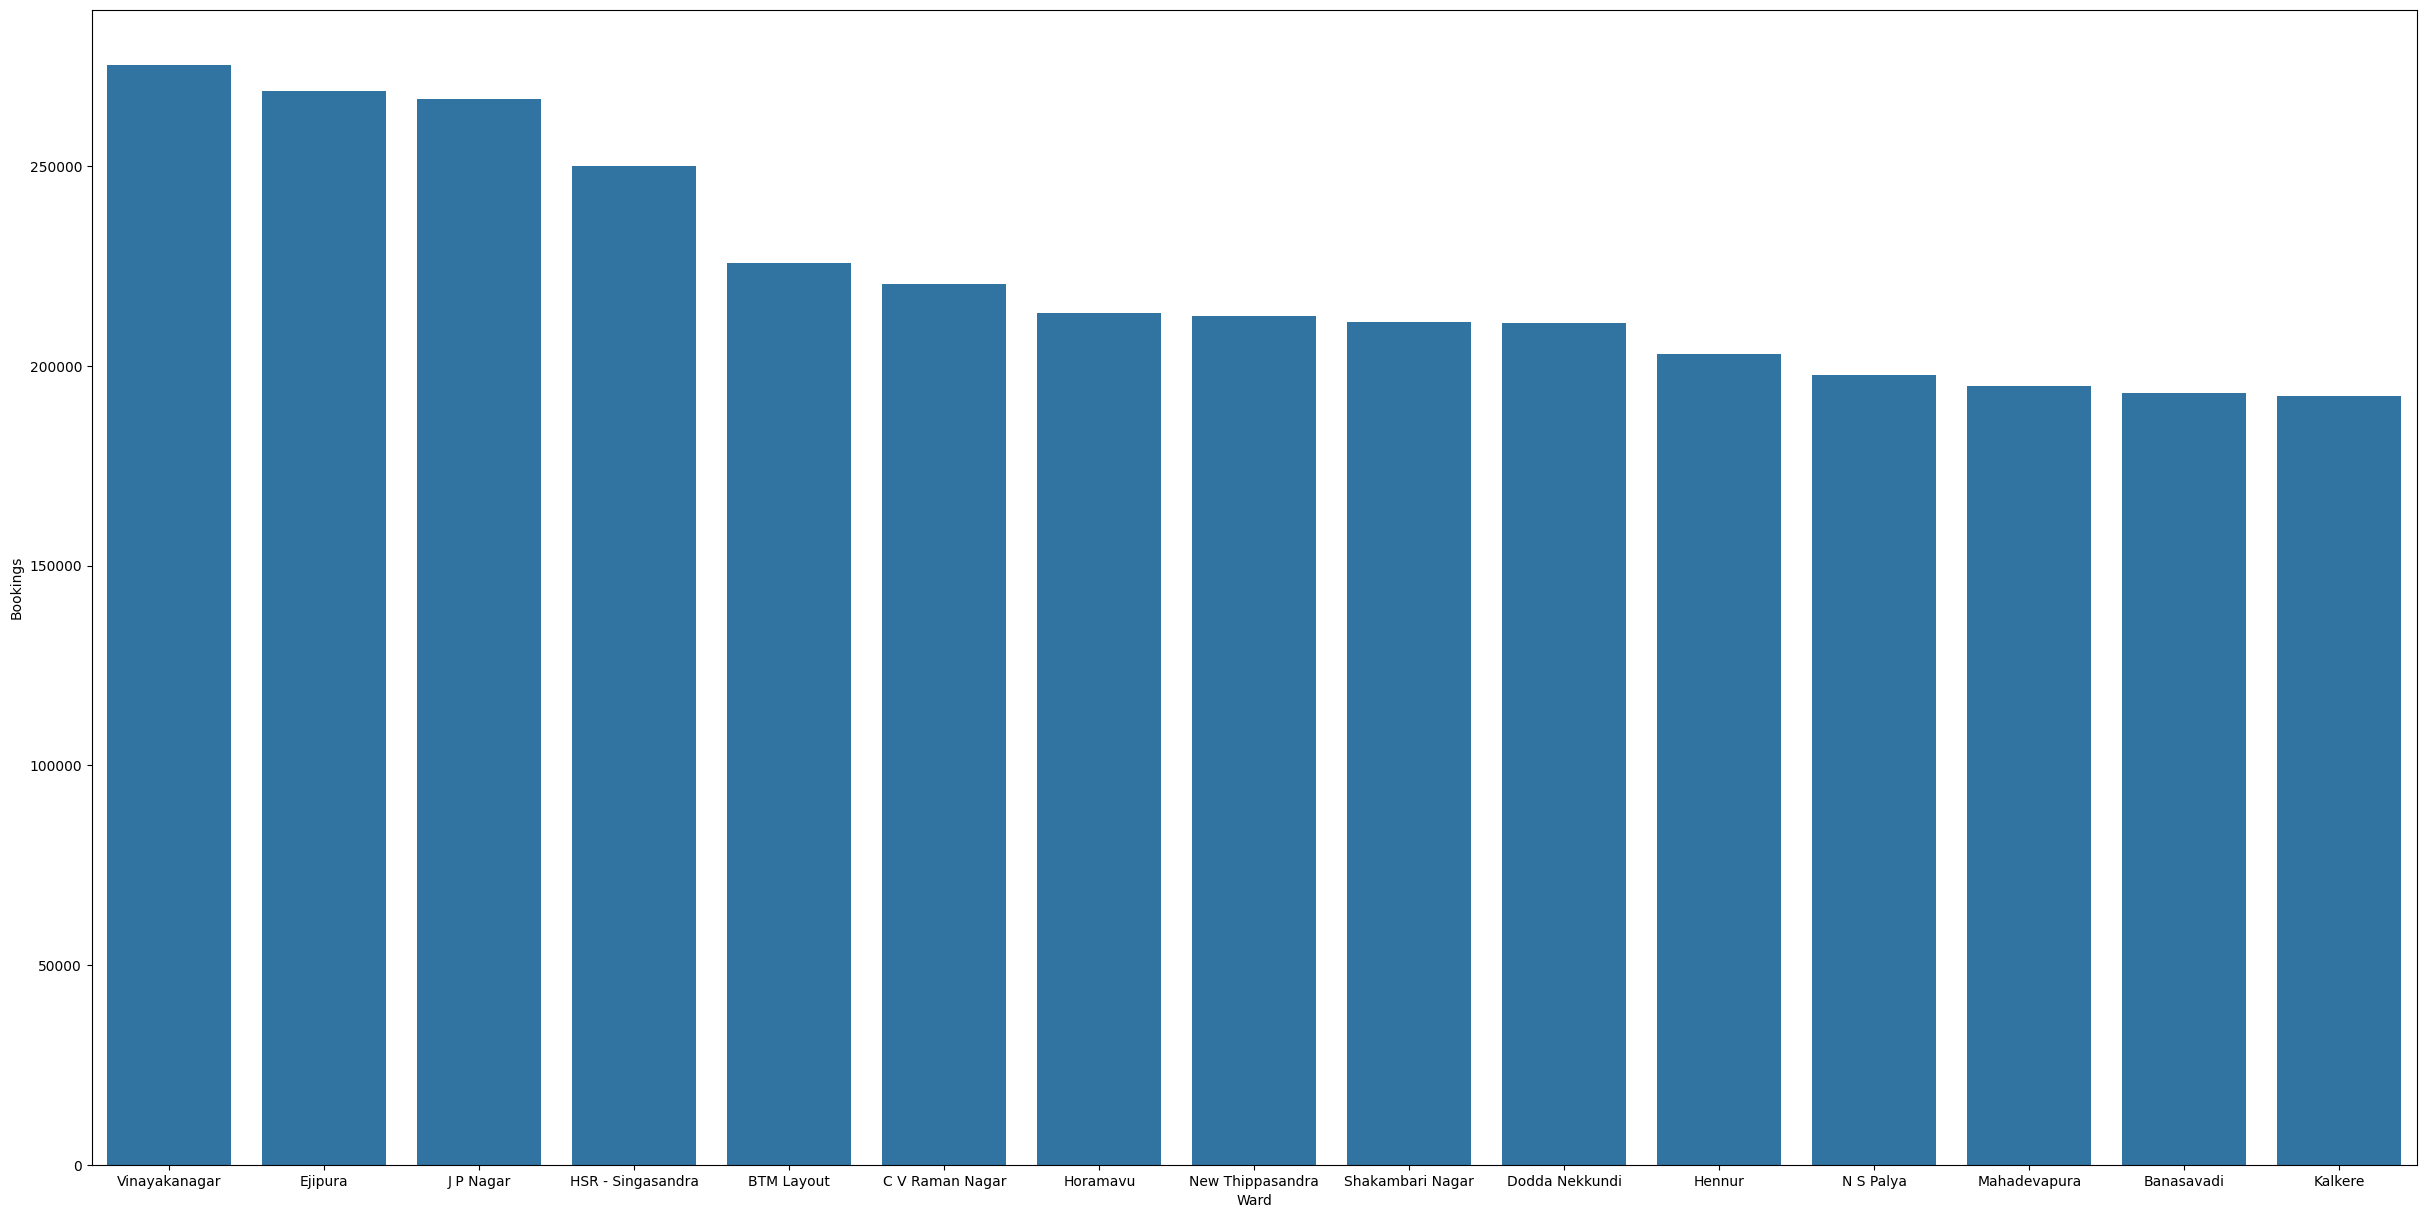

In [214]:
plt.figure(figsize = (30,15))
sns.barplot(x = ward_book_15.index,y =  ward_book_15['Bookings'])

In [215]:
# Which area has more completed trips
data_trips = data.groupby('Ward')['Completed Trips'].sum().sort_values(ascending = False)

In [216]:
data_trips = pd.DataFrame(data_trips, columns = ['Completed Trips'])
data_trips_15 = data_trips.head(15)

<Axes: xlabel='Ward', ylabel='Completed Trips'>

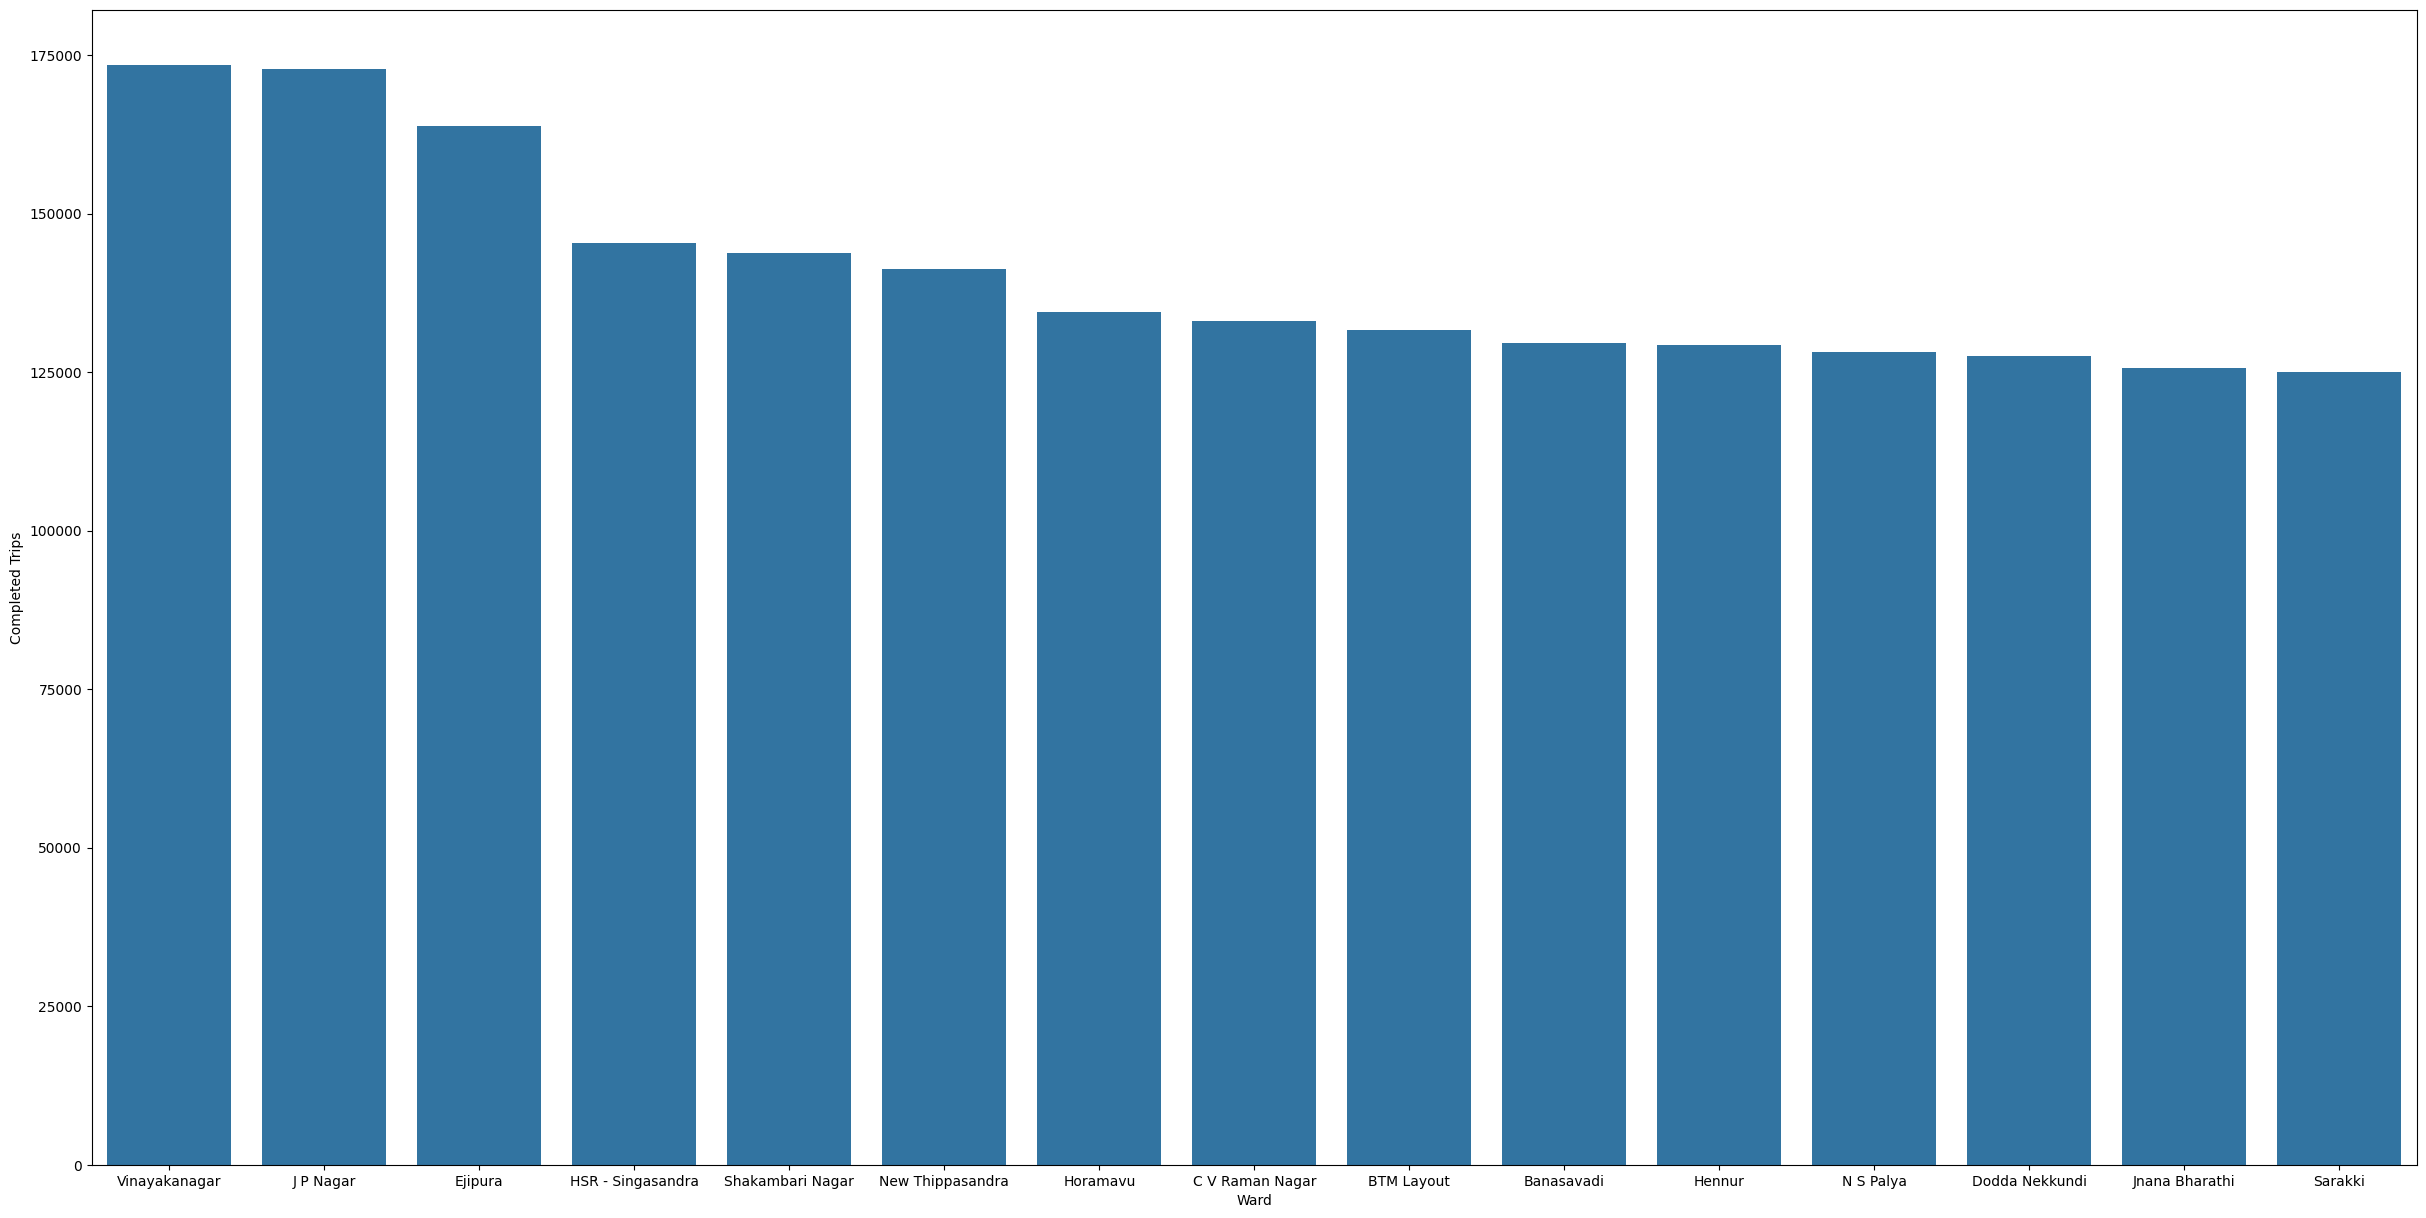

In [217]:
plt.figure(figsize = (30,15))
sns.barplot(x = data_trips_15.index, y = data_trips_15['Completed Trips'])

In [218]:
# Let us check how many bookings are succesfully converting into completed trips
data['pct_diff_bookings_to_trips'] = ((data['Bookings'] - data['Completed Trips']) / data['Bookings'] ) *100

In [219]:
diff_bookings = data.groupby('Ward')['pct_diff_bookings_to_trips'].sum().sort_values(ascending = True)
diff_bookings = pd.DataFrame(diff_bookings, columns=['pct_diff_bookings_to_trips'])
diff_bookings_15 = diff_bookings.head(15)

<Axes: xlabel='Ward', ylabel='pct_diff_bookings_to_trips'>

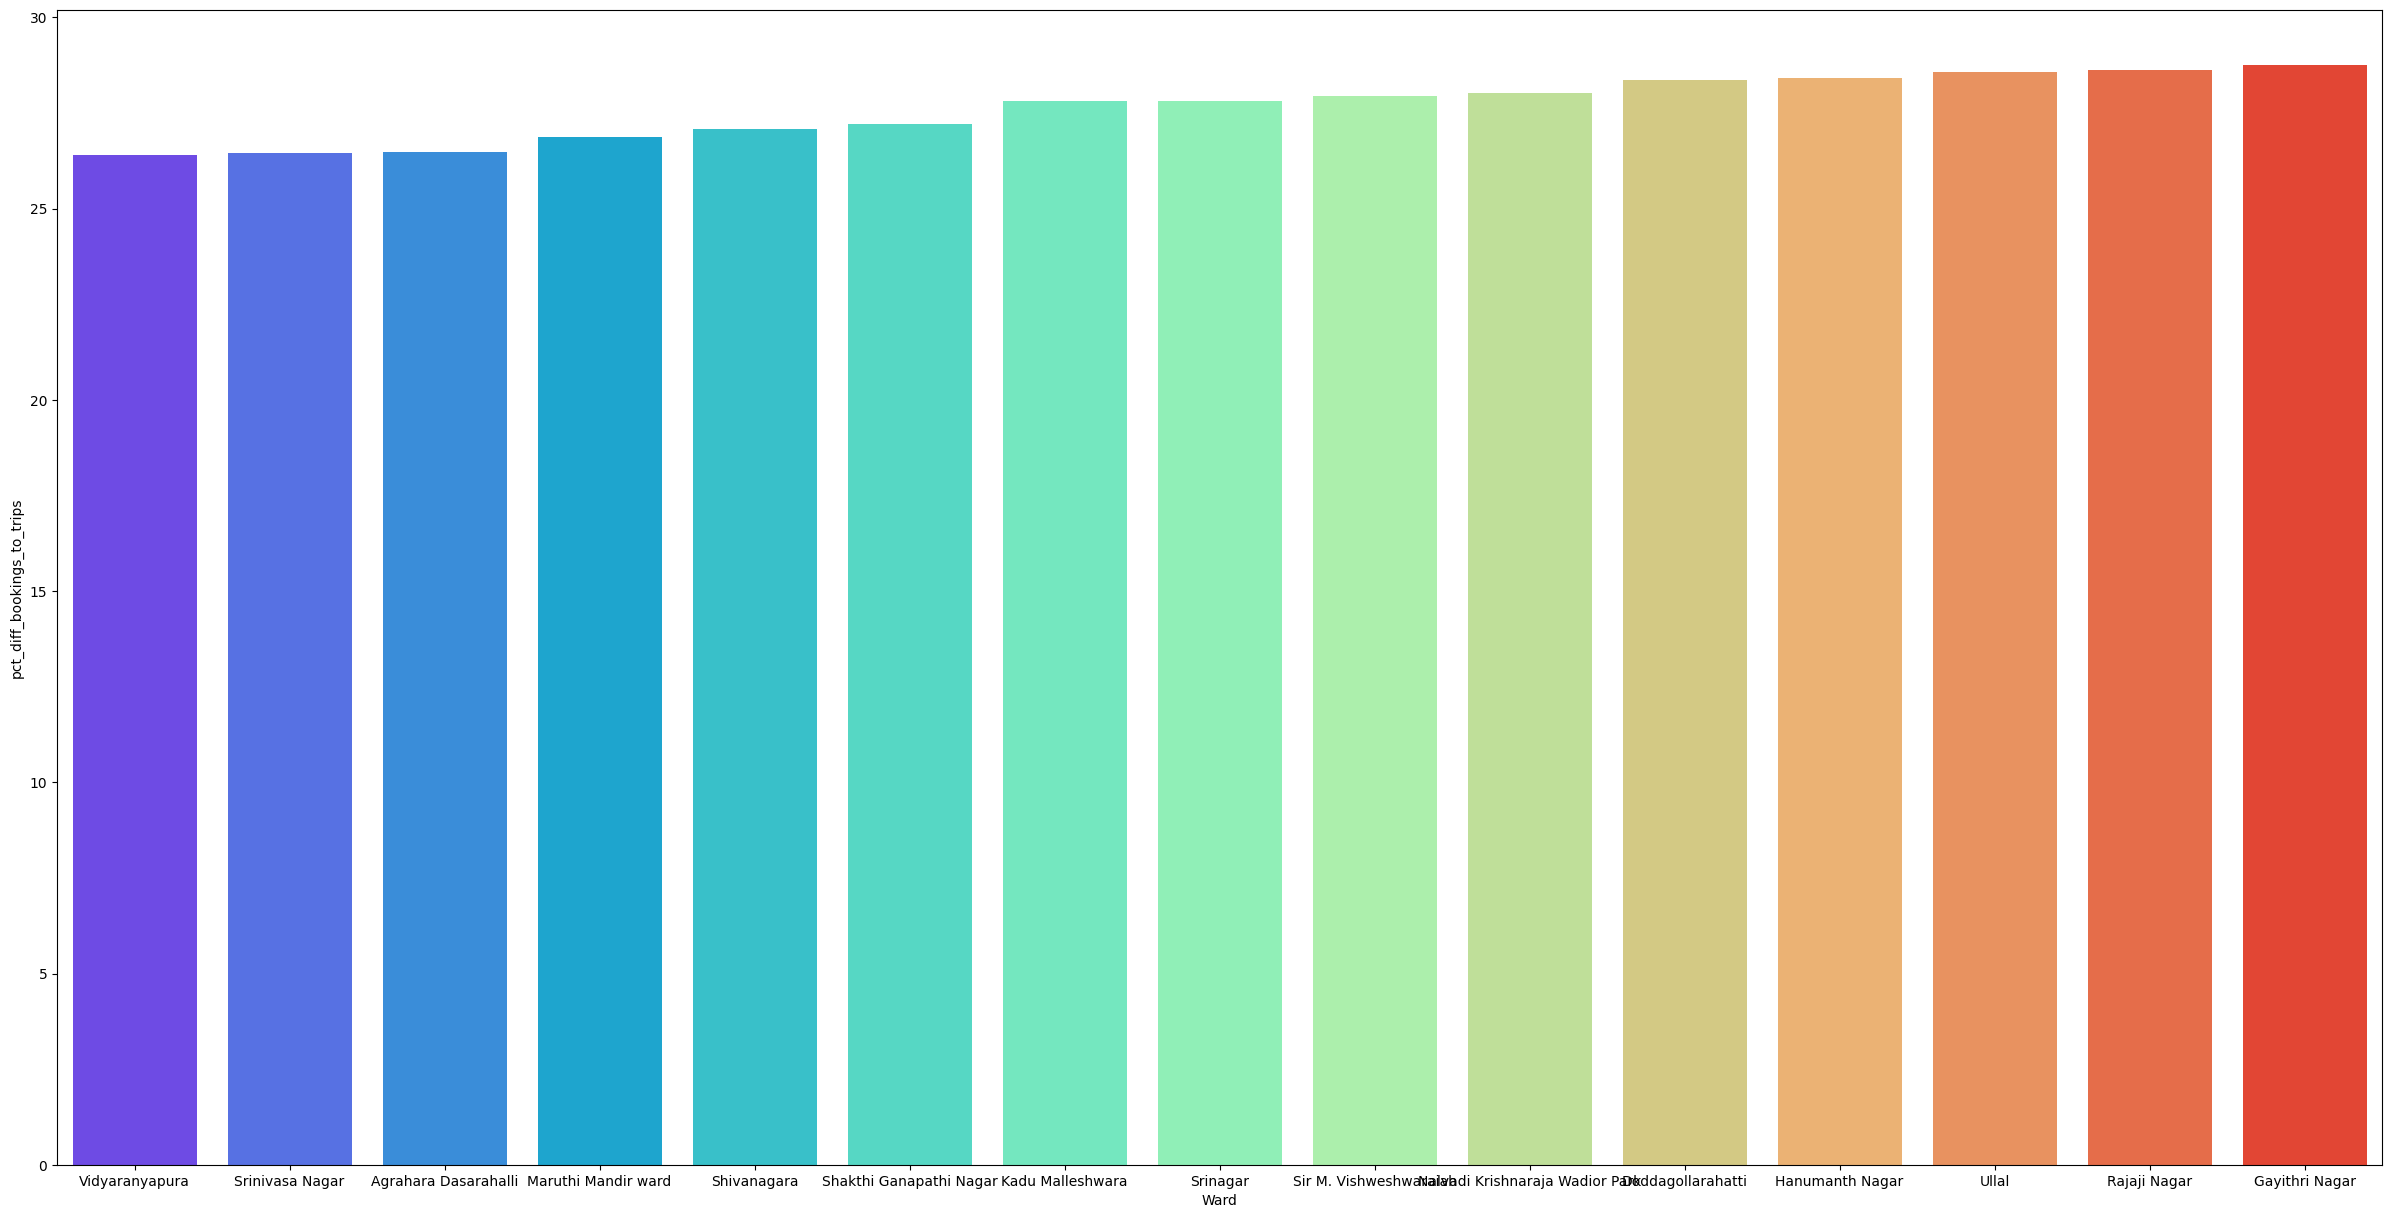

In [220]:
plt.figure(figsize = (30,15))
sns.barplot(x = diff_bookings_15.index, y = diff_bookings_15['pct_diff_bookings_to_trips'],palette = 'rainbow')

In [224]:
cancelled_bookings = data.groupby('Ward')['Cancelled Bookings'].sum().sort_values(ascending = False)
cancelled_bookings = pd.DataFrame(cancelled_bookings, columns=['Cancelled Bookings'])
cancelled_bookings_15 = cancelled_bookings.head(15)

In [225]:
cancelled_bookings_15

Cancelled Bookings
Ward                                            
Ejipura                                   104902
HSR - Singasandra                         104704
Vinayakanagar                             101845
BTM Layout                                 94148
J P Nagar                                  93999
C V Raman Nagar                            87237
Dodda Nekkundi                             83119
Rupenaagrahara                             79081
Horamavu                                   78766
Mahadevapura                               78061
Hennur                                     73580
Dharmaraya Swamy Temple Ward               72800
New Thippasandra                           71126
Kalkere                                    70832
Belathur                                   70818

<Axes: xlabel='Ward', ylabel='Cancelled Bookings'>

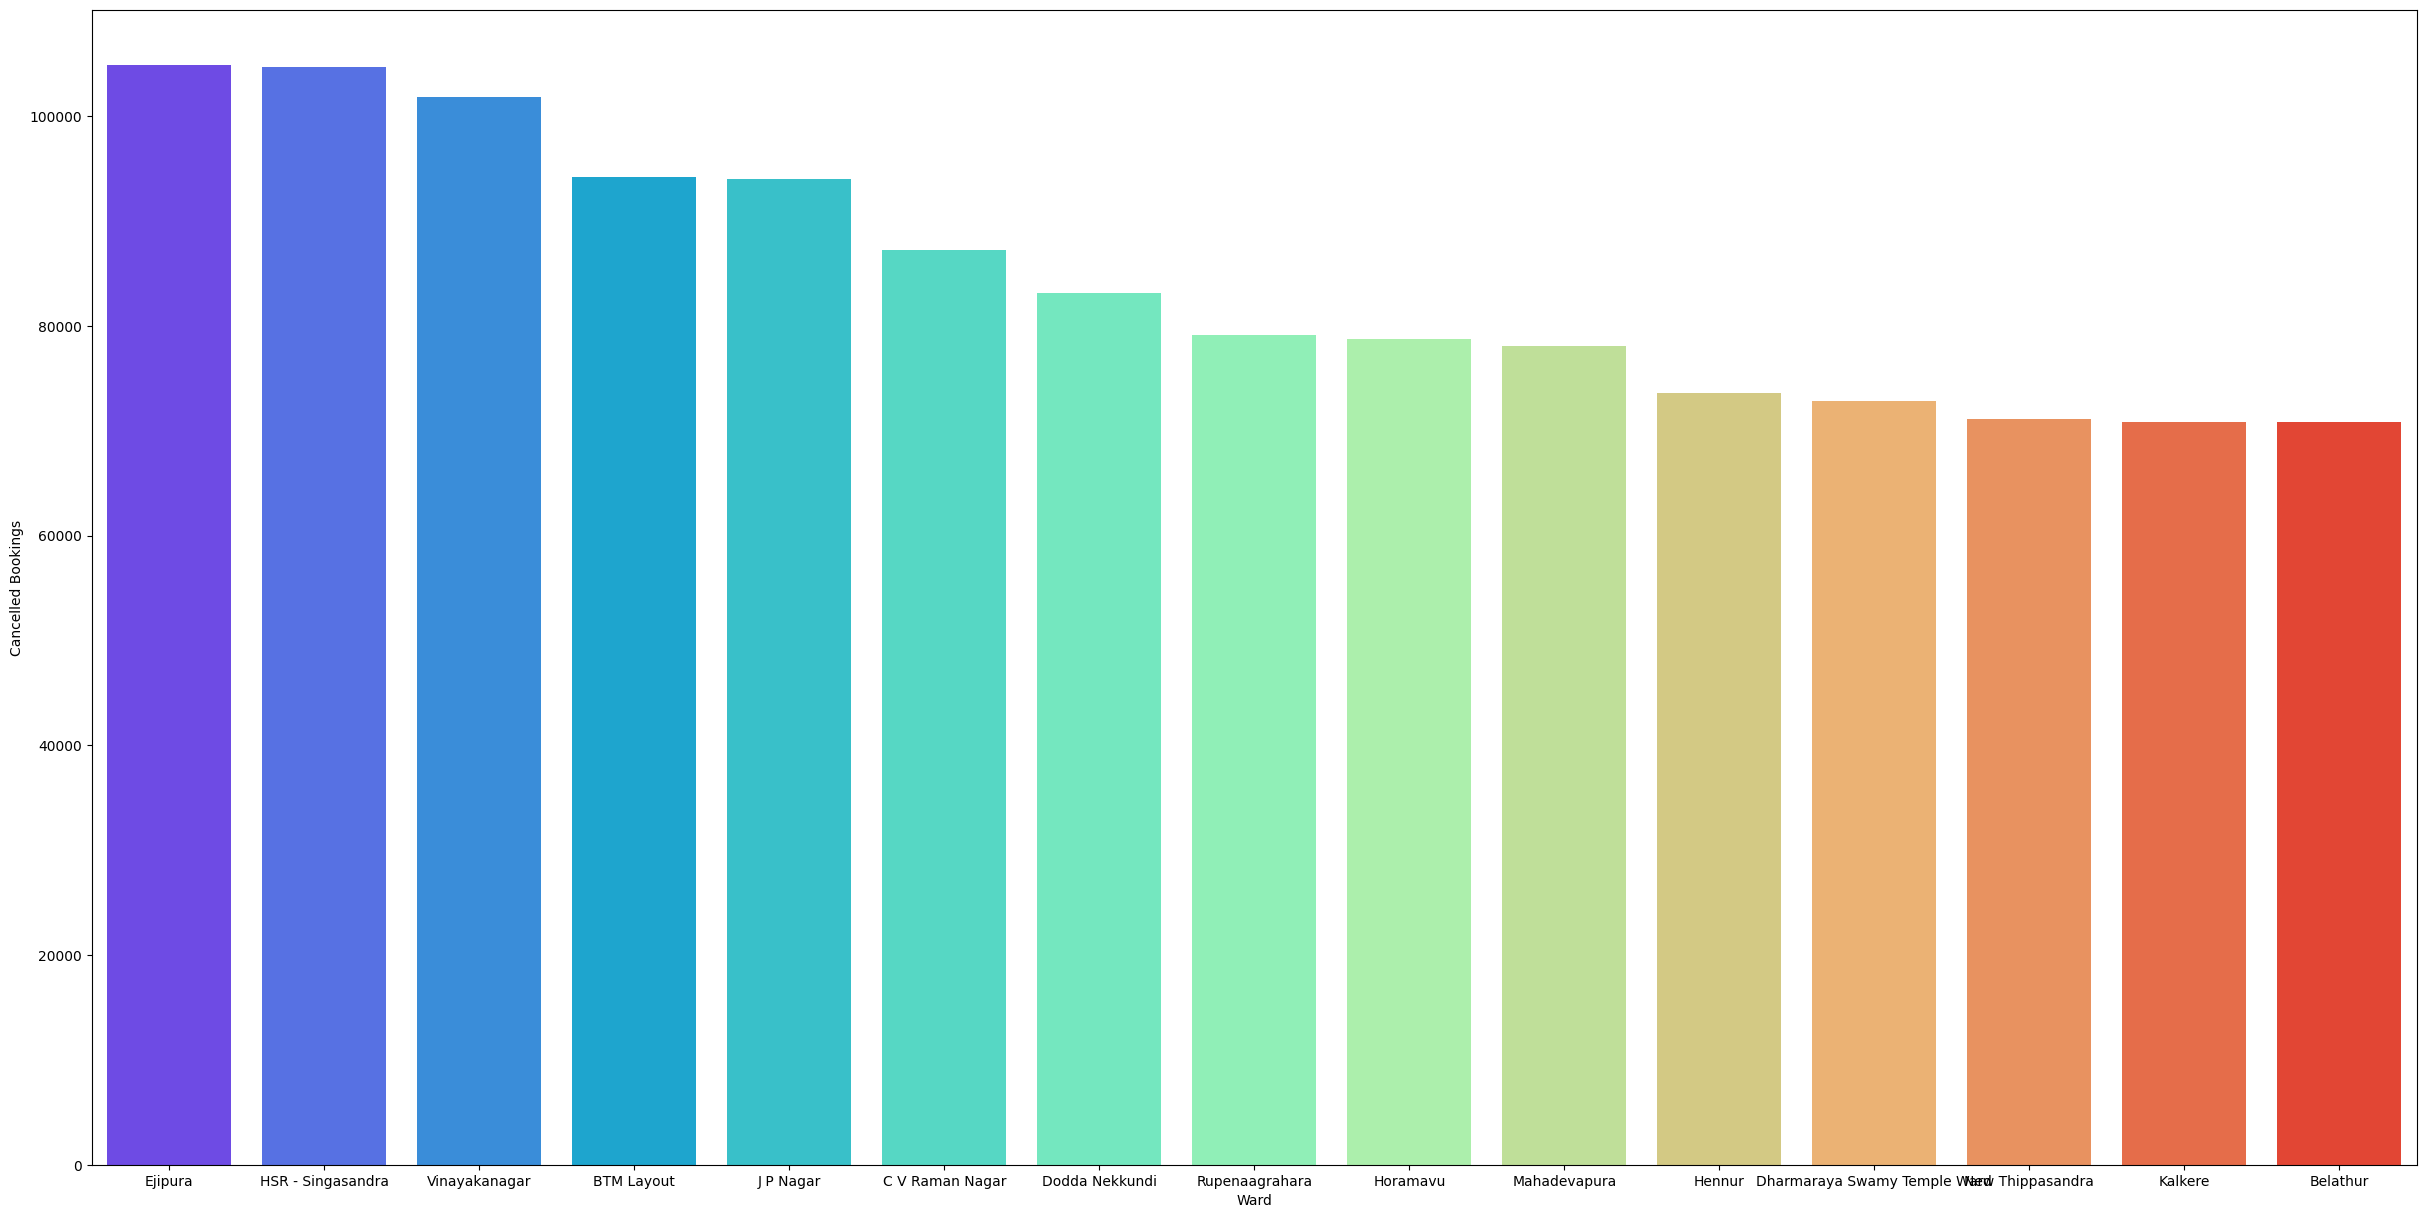

In [226]:
plt.figure(figsize = (30,15))
sns.barplot(x = cancelled_bookings_15.index, y = cancelled_bookings_15['Cancelled Bookings'],palette = 'rainbow')

In [228]:
earn_data = data.groupby('Ward')["Drivers' Earnings"].sum().sort_values(ascending = False)
earn_data = pd.DataFrame(earn_data, columns=["Drivers' Earnings"])
earn_data_15 = earn_data.head(15)

<Axes: xlabel='Ward', ylabel="Drivers' Earnings">

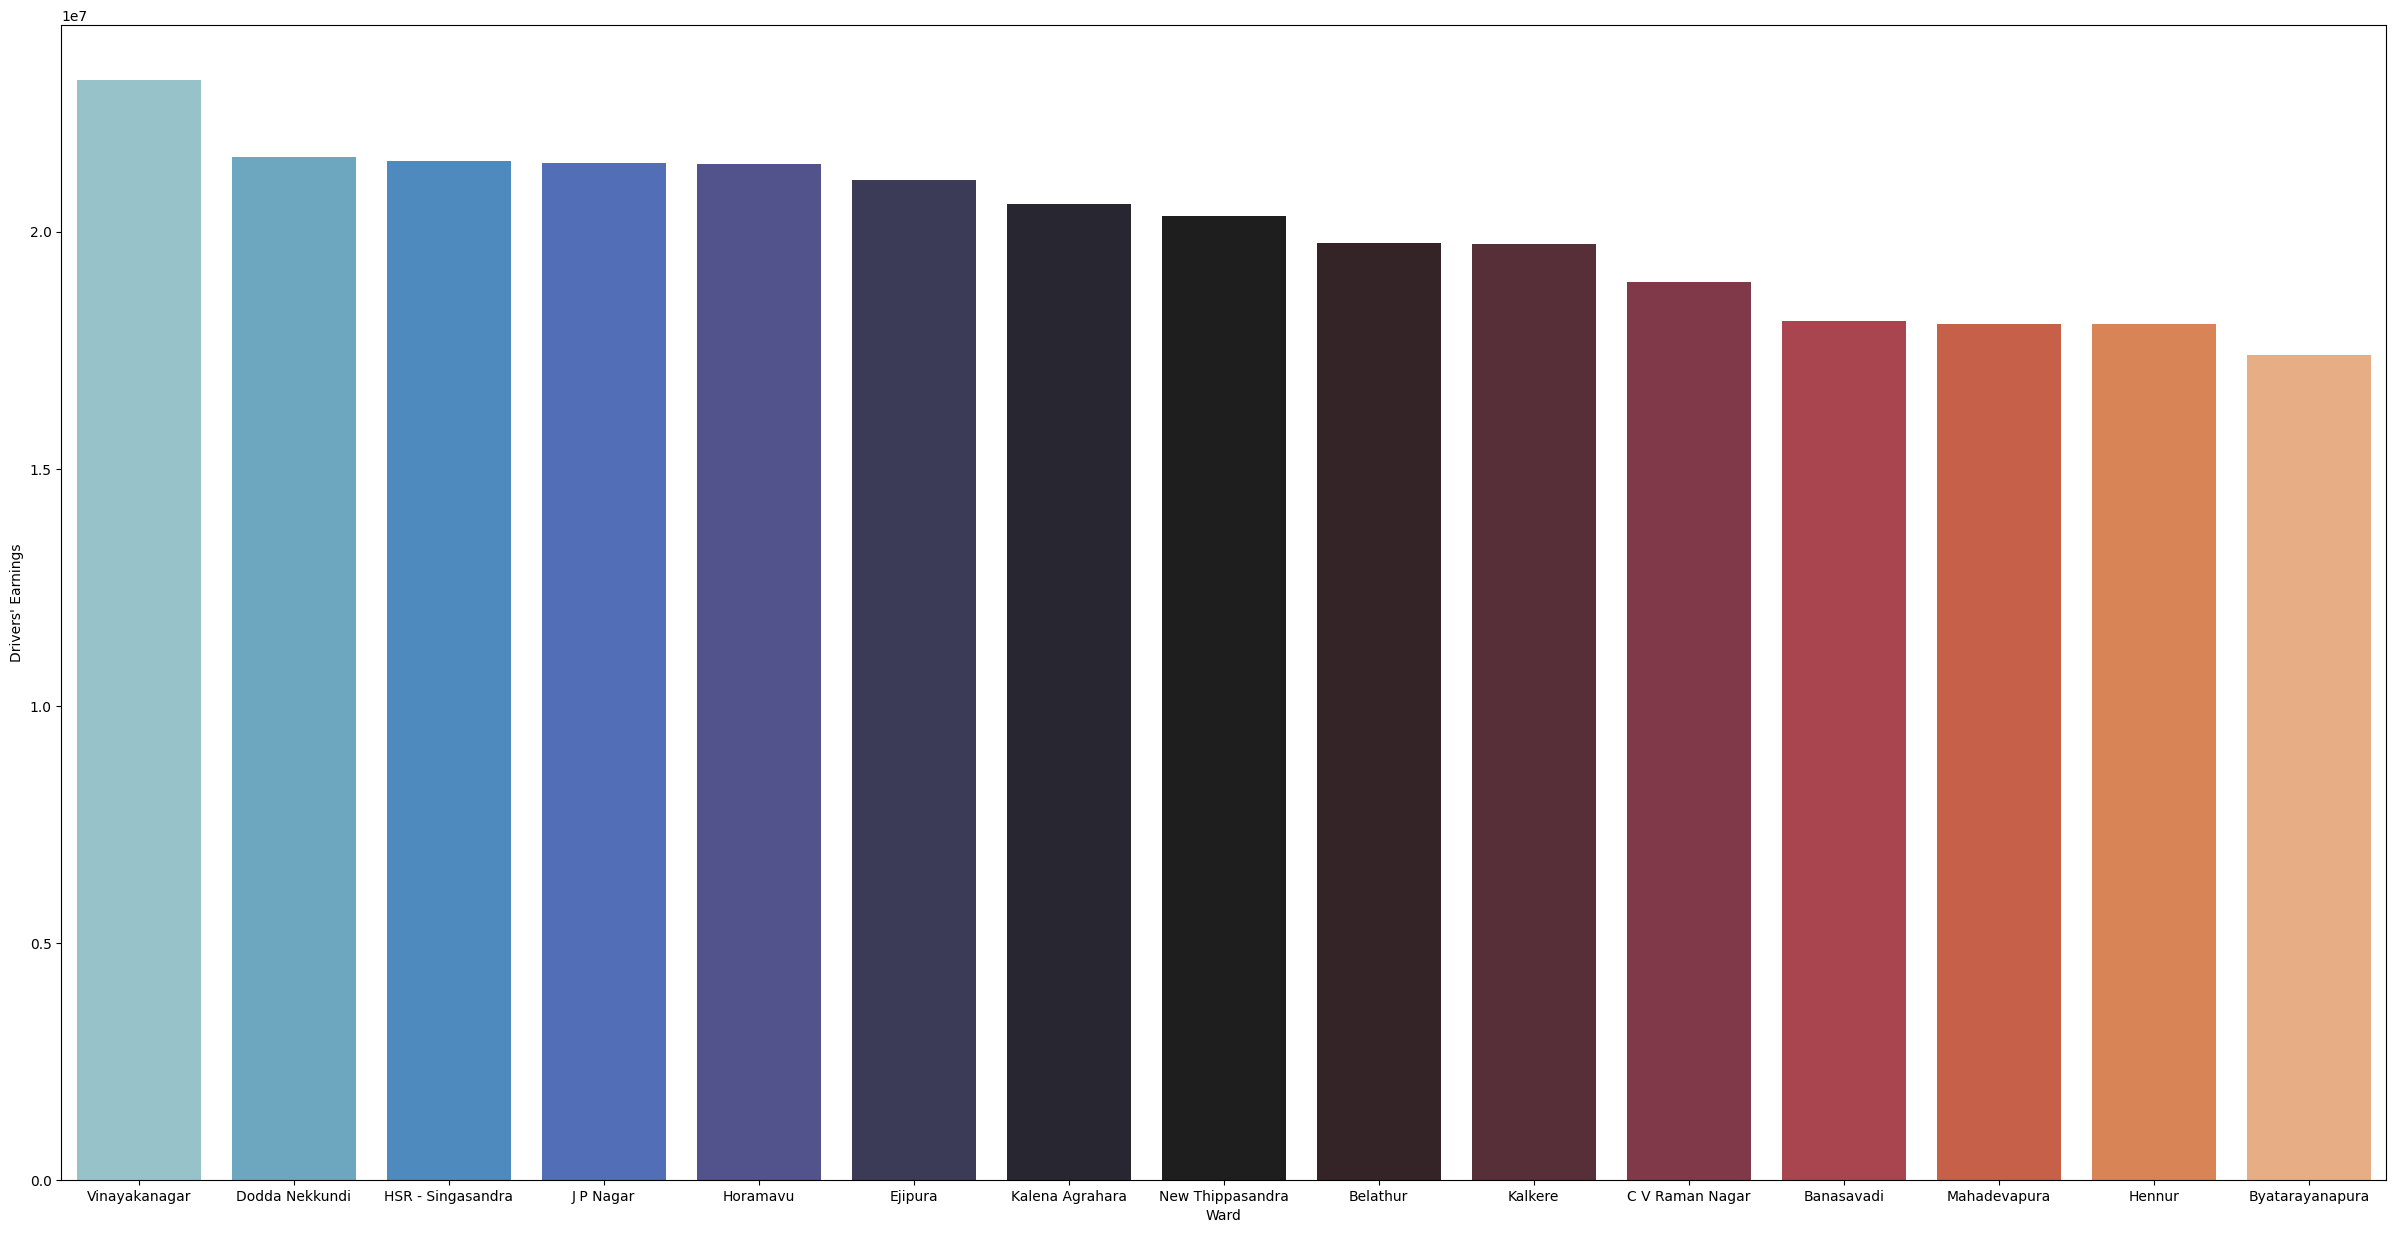

In [229]:
plt.figure(figsize = (30,15))
sns.barplot(x = earn_data_15.index, y = earn_data_15["Drivers' Earnings"],palette = 'icefire')

In [231]:
data.head()

Ward  Searches  Searches which got estimate  \
0      Vinayakanagar    564655                       559717   
1          J P Nagar    526581                       522247   
2            Ejipura    595161                       589132   
3  HSR - Singasandra    633334                       627352   
4   Shakambari Nagar    404779                       401530   

   Searches for Quotes  Searches which got Quotes  Bookings  Completed Trips  \
0               461557                     280715    275406           173474   
1               423506                     272513    266903           172802   
2               496076                     273619    268768           163779   
3               520343                     255679    250108           145339   
4               310798                     215522    211098           143850   

   Search-to-estimate Rate  Estimate-to-search for quotes Rate  \
0                   99.100                              82.500   
1                   99.200                              81.100   
2                   99.000                              84.200   
3                   99.100                              82.900   
4                   99.200                              77.400   

   Quote Acceptance Rate  Quote-to-booking Rate  Cancelled Bookings  \
0                 60.800                 98.100              101845   
1                 64.300                 97.900               93999   
2                 55.200                 98.200              104902   
3                 49.100                 97.800              104704   
4                 69.300                 97.900               67203   

   Booking Cancellation Rate  Conversion Rate  Drivers' Earnings  \
0                     37.000           30.700       23202000.000   
1                     35.200           32.800       21453148.000   
2                     39.000           27.500       21092572.000   
3                     41.900           22.900       21487915.000   
4                     31.800           35.500       16847054.000   

   Average Distance per Trip (km)  Average Fare per Trip  \
0                           7.480                133.850   
1                           6.450                116.660   
2                           6.470                122.290   
3                           7.910                141.290   
4                           6.290                114.150   

   Distance Travelled (km)  pct_diff_bookings_to_trips  Average Fare per km  
0                  1292724                      37.012               17.894  
1                  1186151                      35.257               18.087  
2                  1148191                      39.063               18.901  
3                  1209859                      41.890               17.862  
4                   935402                      31.856               18.148

In [244]:
print(data['Distance Travelled (km)'].quantile(0.25))
print(data['Distance Travelled (km)'].mean())
print(data['Distance Travelled (km)'].quantile(0.75))

251183.75
488398.11235955055
646374.0


In [240]:
data.head()

Searches  Searches which got estimate  Searches for Quotes  \
0    564655                       559717               461557   
1    526581                       522247               423506   
2    595161                       589132               496076   
3    633334                       627352               520343   
4    404779                       401530               310798   

   Searches which got Quotes  Bookings  Completed Trips  \
0                     280715    275406           173474   
1                     272513    266903           172802   
2                     273619    268768           163779   
3                     255679    250108           145339   
4                     215522    211098           143850   

   Search-to-estimate Rate  Estimate-to-search for quotes Rate  \
0                   99.100                              82.500   
1                   99.200                              81.100   
2                   99.000                              84.200   
3                   99.100                              82.900   
4                   99.200                              77.400   

   Quote Acceptance Rate  Quote-to-booking Rate  Cancelled Bookings  \
0                 60.800                 98.100              101845   
1                 64.300                 97.900               93999   
2                 55.200                 98.200              104902   
3                 49.100                 97.800              104704   
4                 69.300                 97.900               67203   

   Booking Cancellation Rate  Conversion Rate  Drivers' Earnings  \
0                     37.000           30.700       23202000.000   
1                     35.200           32.800       21453148.000   
2                     39.000           27.500       21092572.000   
3                     41.900           22.900       21487915.000   
4                     31.800           35.500       16847054.000   

   Distance Travelled (km)  Average Fare per km            dis_cate  
0                  1292724               17.894  very long distance  
1                  1186151               18.087  very long distance  
2                  1148191               18.901  very long distance  
3                  1209859               17.862  very long distance  
4                   935402               18.148  very long distance

## Feature Engineering

In [230]:
data['Average Fare per km'] = (data['Average Fare per Trip'] / data['Average Distance per Trip (km)']).astype(float)

In [232]:
data.drop(columns = ['Ward','pct_diff_bookings_to_trips','Average Fare per Trip','Average Distance per Trip (km)'], axis =1, inplace = True)

In [246]:
data.head()

Searches  Searches which got estimate  Searches for Quotes  \
0    564655                       559717               461557   
1    526581                       522247               423506   
2    595161                       589132               496076   
3    633334                       627352               520343   
4    404779                       401530               310798   

   Searches which got Quotes  Bookings  Completed Trips  \
0                     280715    275406           173474   
1                     272513    266903           172802   
2                     273619    268768           163779   
3                     255679    250108           145339   
4                     215522    211098           143850   

   Search-to-estimate Rate  Estimate-to-search for quotes Rate  \
0                   99.100                              82.500   
1                   99.200                              81.100   
2                   99.000                              84.200   
3                   99.100                              82.900   
4                   99.200                              77.400   

   Quote Acceptance Rate  Quote-to-booking Rate  Cancelled Bookings  \
0                 60.800                 98.100              101845   
1                 64.300                 97.900               93999   
2                 55.200                 98.200              104902   
3                 49.100                 97.800              104704   
4                 69.300                 97.900               67203   

   Booking Cancellation Rate  Conversion Rate  Drivers' Earnings  \
0                     37.000           30.700       23202000.000   
1                     35.200           32.800       21453148.000   
2                     39.000           27.500       21092572.000   
3                     41.900           22.900       21487915.000   
4                     31.800           35.500       16847054.000   

   Distance Travelled (km)  Average Fare per km            dis_cate  
0                  1292724               17.894  very long distance  
1                  1186151               18.087  very long distance  
2                  1148191               18.901  very long distance  
3                  1209859               17.862  very long distance  
4                   935402               18.148  very long distance

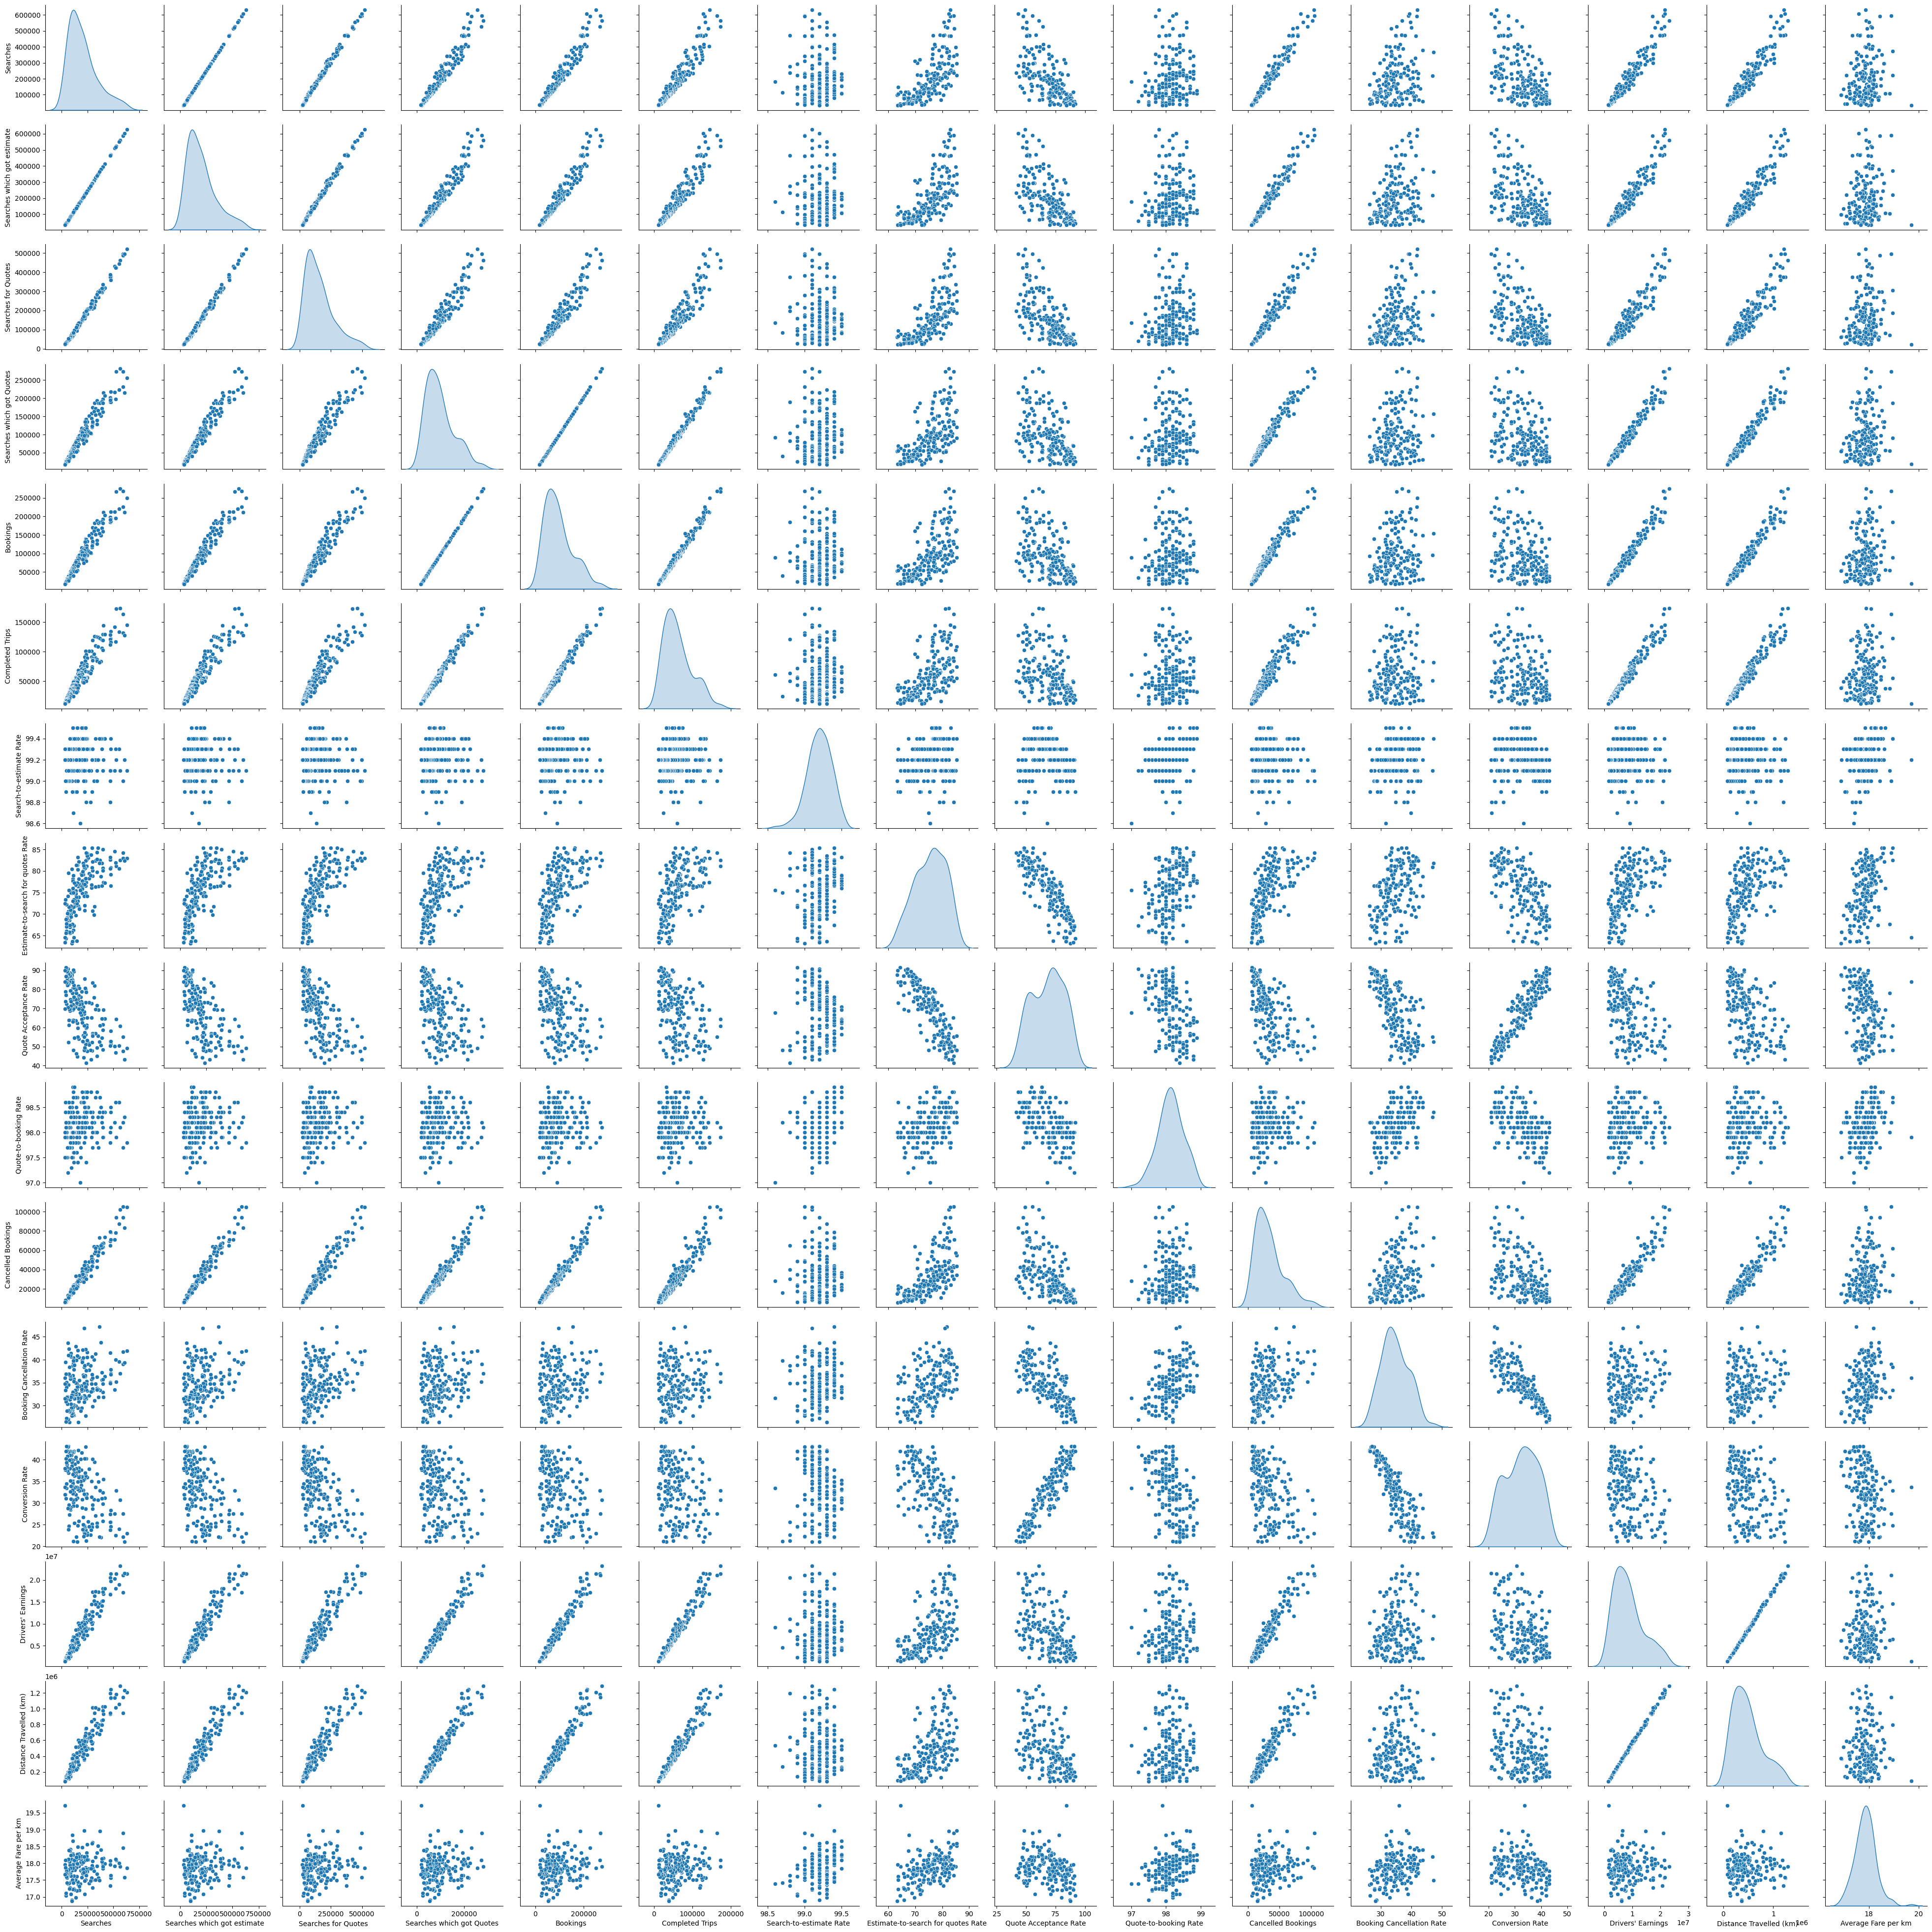

In [235]:
sns.pairplot(data, diag_kind = 'kde')

Multi collinearity test

In [254]:
np.linalg.det(data.corr()).astype(float)

2.2210653643380272e-35

<Axes: >

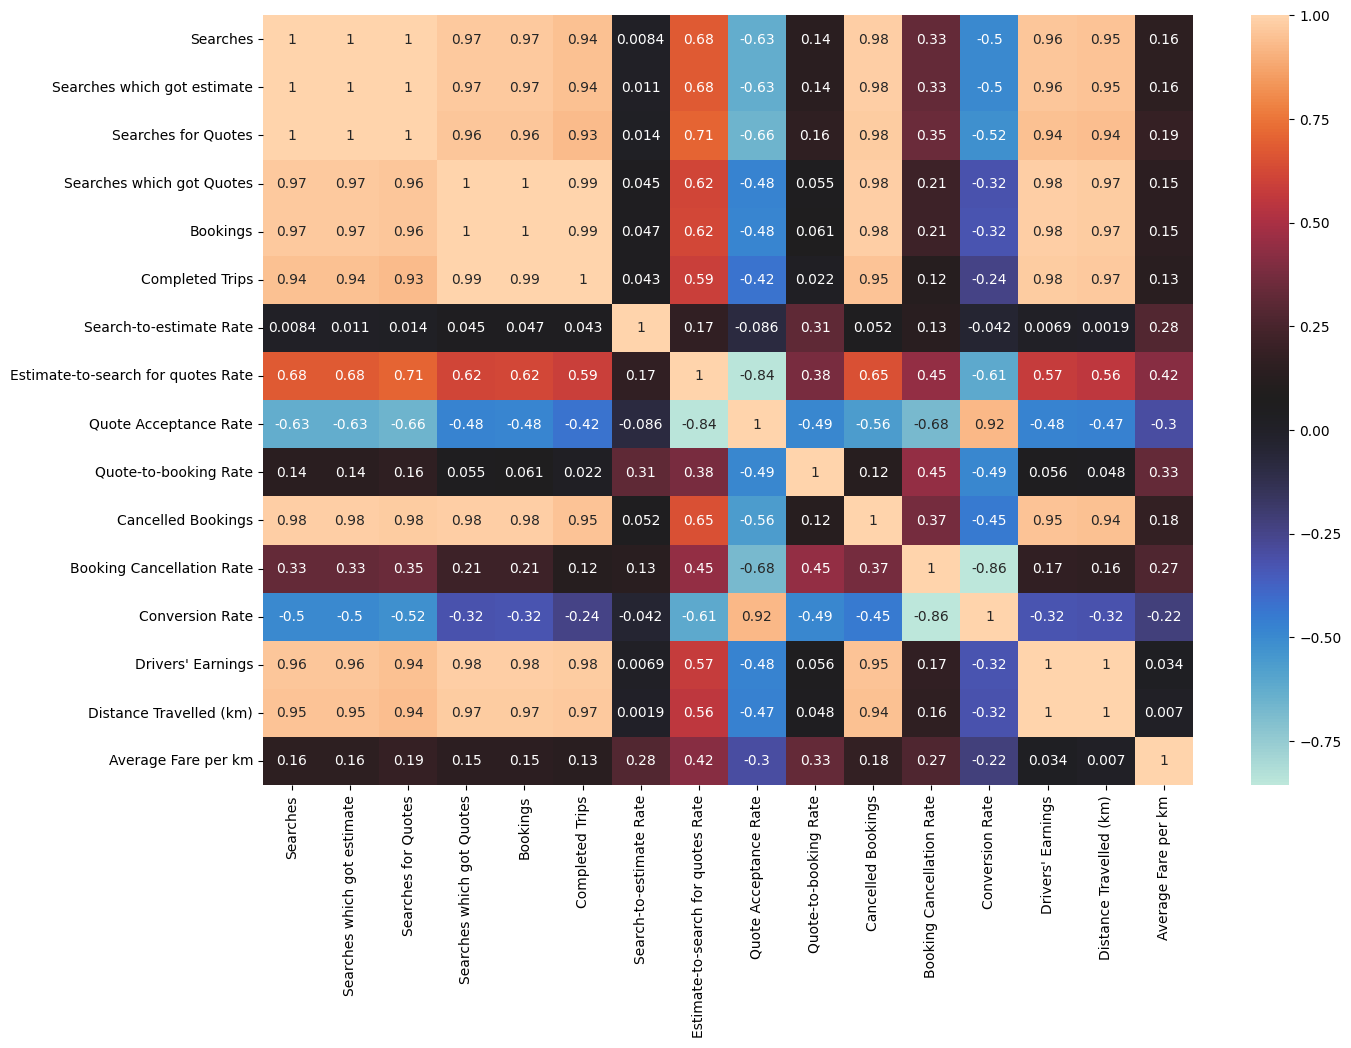

In [258]:
# Corelation with the dataset
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True, cmap = 'icefire')

In [259]:
def corellation(data, threshold) :
  col_corr = set()
  corr_matrix = data.corr()
  for i in range(len(corr_matrix.columns)) :
    for j in range(i) :
      if abs(corr_matrix.iloc[i,j]) > threshold :
        col_name = corr_matrix.columns[i]
        col_corr.add(col_name)

  return col_corr

In [261]:
drop_col = corellation(data, 0.85)

In [262]:
drop_col

{'Bookings',
 'Cancelled Bookings',
 'Completed Trips',
 'Conversion Rate',
 'Distance Travelled (km)',
 "Drivers' Earnings",
 'Searches for Quotes',
 'Searches which got Quotes',
 'Searches which got estimate'}

In [265]:
data.drop(columns = drop_col, axis =1, inplace = True)

<Axes: >

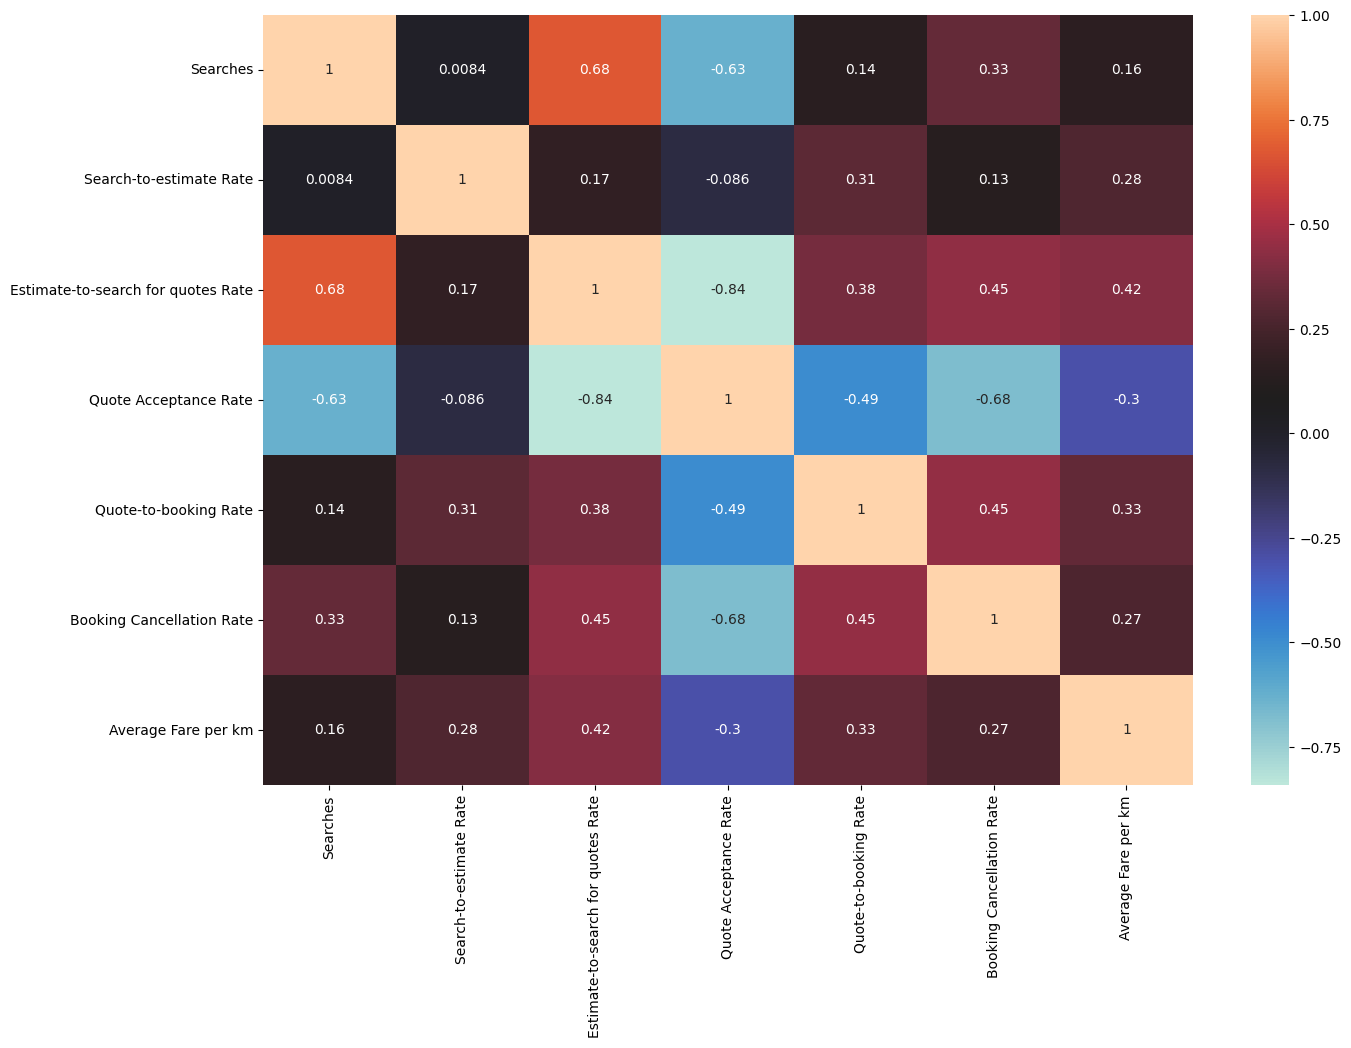

In [267]:
# Corelation with the dataset
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True, cmap = 'icefire')

In [269]:
# Scaling down the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data)

In [266]:
data.head()

Searches  Search-to-estimate Rate  Estimate-to-search for quotes Rate  \
0    564655                   99.100                              82.500   
1    526581                   99.200                              81.100   
2    595161                   99.000                              84.200   
3    633334                   99.100                              82.900   
4    404779                   99.200                              77.400   

   Quote Acceptance Rate  Quote-to-booking Rate  Booking Cancellation Rate  \
0                 60.800                 98.100                     37.000   
1                 64.300                 97.900                     35.200   
2                 55.200                 98.200                     39.000   
3                 49.100                 97.800                     41.900   
4                 69.300                 97.900                     31.800   

   Average Fare per km  
0               17.894  
1               18.087  
2               18.901  
3               17.862  
4               18.148

In [271]:
scaled_data = pd.DataFrame(scaled_data)
scaled_data.columns = ['Searches','Search-to-estimate Rate','Estimate-to-search for quotes Rate','Quote Acceptance Rate','Quote-to-booking Rate',	'Booking Cancellation Rate','Average Fare per km']

scaled_data.describe()

Searches  Search-to-estimate Rate  Estimate-to-search for quotes Rate  \
count   178.000                  178.000                             178.000   
mean      0.000                   -0.000                              -0.000   
std       1.003                    1.003                               1.003   
min      -1.237                   -3.655                              -2.157   
25%      -0.748                   -0.601                              -0.789   
50%      -0.268                    0.010                               0.157   
75%       0.453                    0.621                               0.865   
max       3.122                    1.843                               1.749   

       Quote Acceptance Rate  Quote-to-booking Rate  \
count                178.000                178.000   
mean                   0.000                 -0.000   
std                    1.003                  1.003   
min                   -2.014                 -3.123   
25%                   -0.922                 -0.646   
50%                    0.114                  0.042   
75%                    0.823                  0.730   
max                    1.746                  2.106   

       Booking Cancellation Rate  Average Fare per km  
count                    178.000              178.000  
mean                      -0.000                0.000  
std                        1.003                1.003  
min                       -1.904               -2.366  
25%                       -0.666               -0.606  
50%                       -0.105               -0.010  
75%                        0.721                0.583  
max                        2.864                4.475

<Axes: >

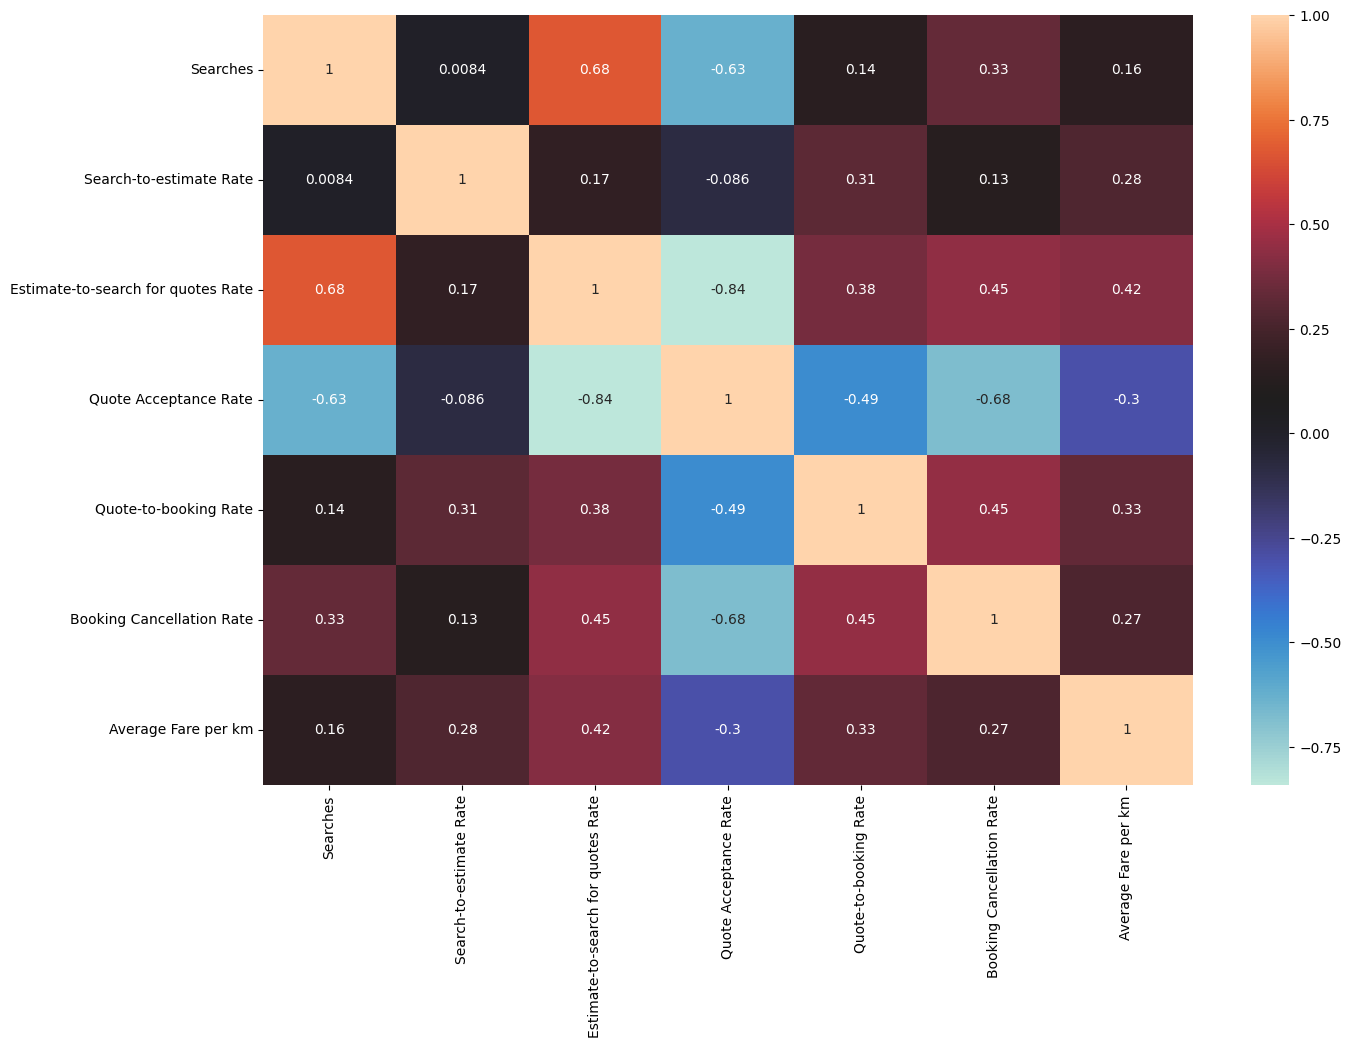

In [272]:
# Corelation with the dataset
plt.figure(figsize = (15,10))
sns.heatmap(scaled_data.corr(), annot = True, cmap = 'icefire')

## Kmeans

In [273]:
# KMeans Clustering

from sklearn.cluster import KMeans
# for determing K (Elbow curve)
k_vals = np.arange(3,15)
wcss = []
for i in k_vals:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_data)
  wcss.append([i,kmeans.inertia_])

print(wcss)

[[3, 681.8139256640154], [4, 602.6908802415221], [5, 554.4091000215624], [6, 513.6447857347705], [7, 484.54690537661963], [8, 454.3357646923119], [9, 423.29723318101236], [10, 401.29206630497646], [11, 385.9362158848806], [12, 371.63986553610886], [13, 352.8042711760557], [14, 336.2905444617154]]


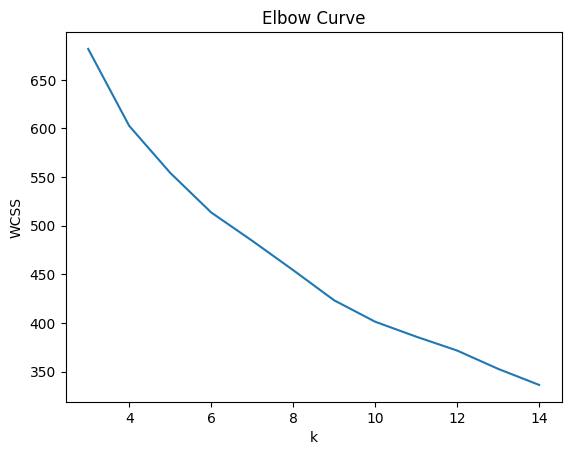

In [275]:
wcss = pd.DataFrame(wcss, columns = ['k', 'WCSS'])
sns.lineplot(x = 'k', y = 'WCSS', data = wcss)
plt.ylabel('K')
plt.ylabel('WCSS')
plt.title('Elbow Curve')
plt.show()

In [277]:
from sklearn.metrics import silhouette_score

k_vals = np.arange(3, 15)
wcss = []
silhouette_scores = []

for i in k_vals:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data)

    # Calculate WCSS (Within-Cluster Sum of Square)
    wcss.append([i, kmeans.inertia_])

    # Calculate silhouette score
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append([i, score])

# Convert to DataFrame for plotting
wcss_df = pd.DataFrame(wcss, columns=['k', 'WCSS'])
silhouette_df = pd.DataFrame(silhouette_scores, columns=['k', 'Silhouette Score'])

Text(0.5, 1.0, 'Silhouette Scores')

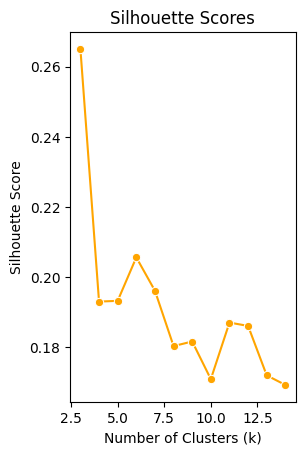

In [278]:
# Plot Silhouette Scores
plt.subplot(1, 2, 2)
sns.lineplot(x='k', y='Silhouette Score', data=silhouette_df, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')

Hierarchical Clustering


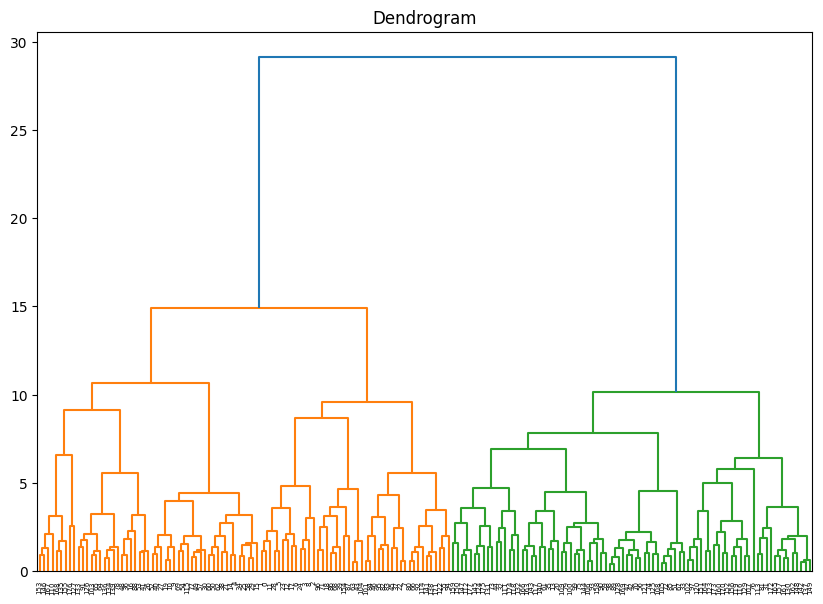

Silhouette Score for k=4: 0.15421936640387965


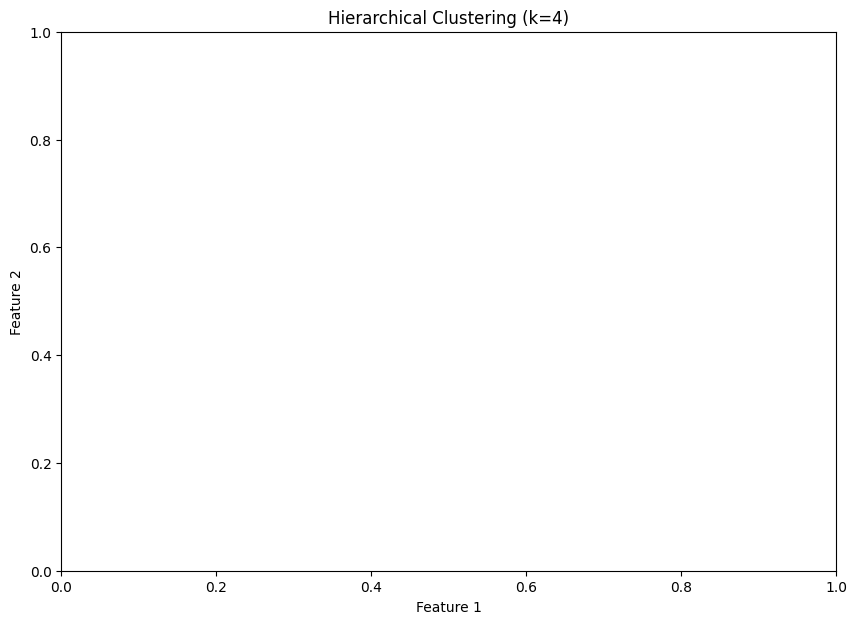

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming scaled_data is already defined and preprocessed

# Dendrogram for hierarchical clustering
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()

# Hierarchical Clustering with k=4
k = 4
hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(scaled_data)

# Calculate silhouette score for k=4
silhouette_avg = silhouette_score(scaled_data, hc_labels)
print(f'Silhouette Score for k={k}: {silhouette_avg}')

# Convert scaled data to DataFrame for easier plotting
scaled_df = pd.DataFrame(scaled_data, columns=['Feature1', 'Feature2'])

# Add cluster labels to DataFrame
scaled_df['Cluster'] = hc_labels

# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Feature1', y='Feature2', hue='Cluster', palette='viridis', data=scaled_df, s=100)
plt.title(f'Hierarchical Clustering (k={k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


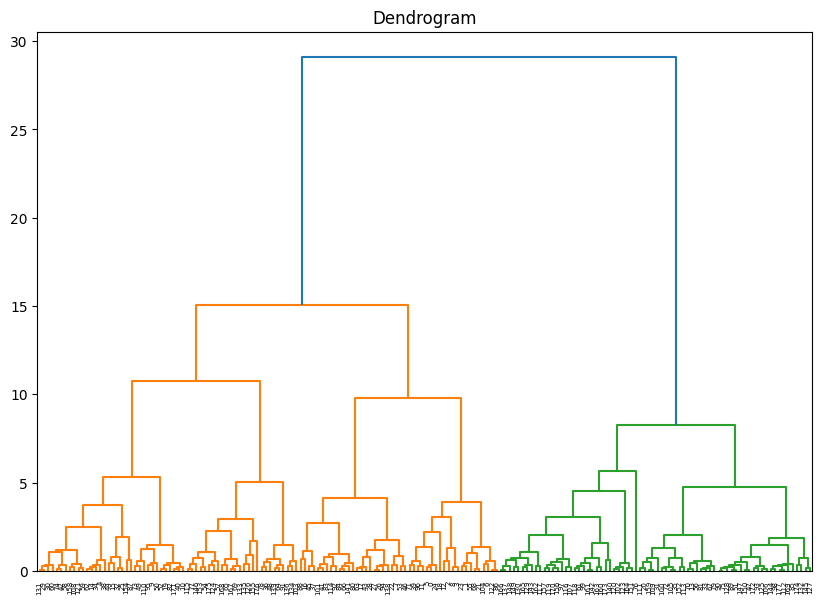

Silhouette Score for k=4: 0.348899975443013


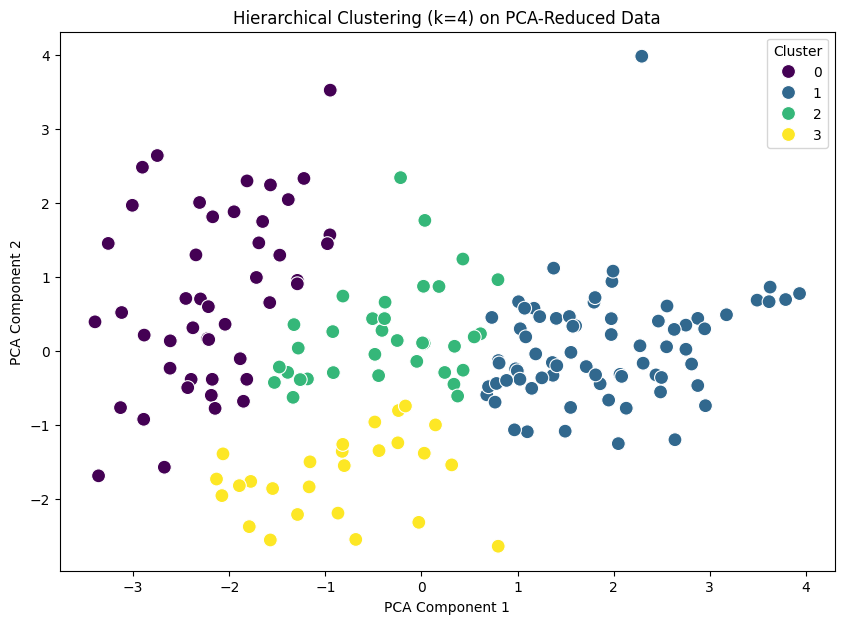

In [283]:
from sklearn.decomposition import PCA

# Perform PCA to reduce the dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Convert PCA results to DataFrame for easier plotting
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

# Dendrogram for hierarchical clustering
linked = linkage(pca_data, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()

# Hierarchical Clustering with k=4
k = 4
hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(pca_data)

# Calculate silhouette score for k=4
silhouette_avg = silhouette_score(pca_data, hc_labels)
print(f'Silhouette Score for k={k}: {silhouette_avg}')

# Add cluster labels to PCA DataFrame
pca_df['Cluster'] = hc_labels

# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=pca_df, s=100)
plt.title(f'Hierarchical Clustering (k={k}) on PCA-Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


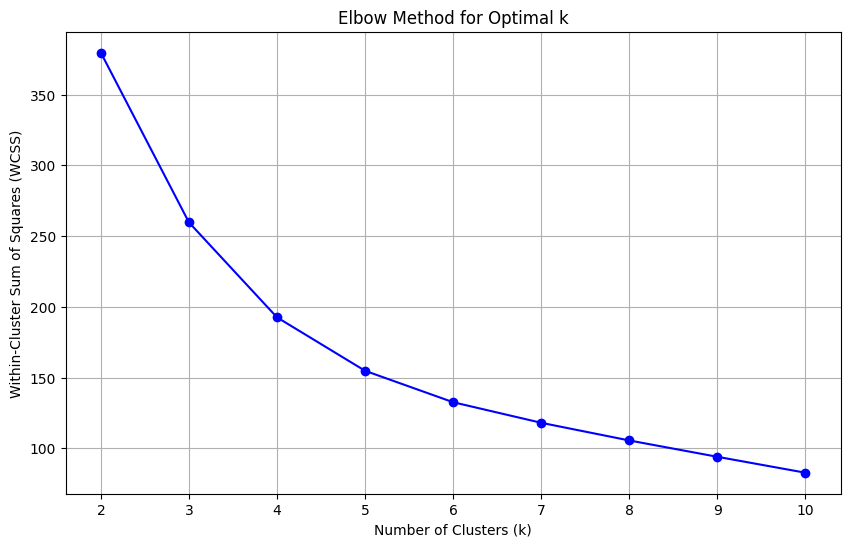

Silhouette Score for k=2: 0.4662401951508956
Silhouette Score for k=3: 0.43984815516214176
Silhouette Score for k=4: 0.37647429512105646
Silhouette Score for k=5: 0.38463809614824457
Silhouette Score for k=6: 0.3536594185462625
Silhouette Score for k=7: 0.3630840416835896
Silhouette Score for k=8: 0.3605790565632264
Silhouette Score for k=9: 0.3564948793188331
Silhouette Score for k=10: 0.3562529642422058


In [286]:
# Determine optimal k using elbow method
k_vals = range(2, 11)  # Range of k values to try
wcss = []  # Within-cluster sum of squares

for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_vals, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_vals)
plt.grid(True)
plt.show()

# Calculate silhouette score for each k
silhouette_scores = []

for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans_labels = kmeans.fit_predict(pca_data)
    silhouette_avg = silhouette_score(pca_data, kmeans_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'Silhouette Score for k={k}: {silhouette_avg}')

<Axes: >

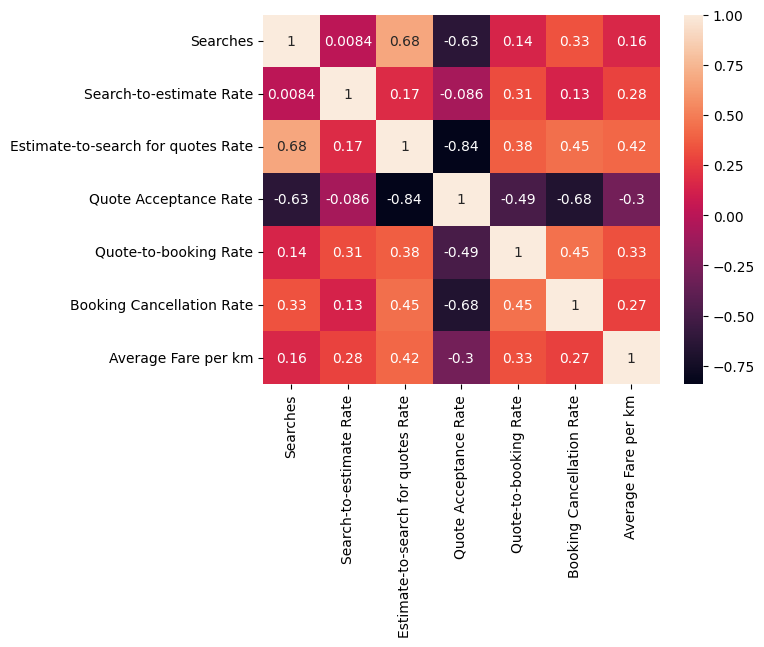

In [285]:
sns.heatmap(scaled_data.corr(),annot = True)